In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('d13c_')[1]
    site_name.append(site)

tiff_dir = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\AVIRIS_NG_Spectra'


band_data_list = []

for f_name in site_name:
    print(f_name)
    band_data_dict = {"filename": f_name}

    dataset = gdal.Open(os.path.join(tiff_dir, f_name))
    num_bands = dataset.RasterCount
    for band in range(1, num_bands + 1):
        # Get the band object
        band_obj = dataset.GetRasterBand(band)

        # Get band name, you might need to adjust this part to get the actual band name
        band_name = f"band_{band}"

        # Read band data as an array
        band_values = band_obj.ReadAsArray()

        # Filter out the -9999.0 values and get the valid values
        valid_values = [val for val in band_values.flatten() if val != -9999.0]

        # Store the valid values with the band name
        band_data_dict[band_name] = valid_values

    band_data_list.append(band_data_dict)

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(band_data_list)
for column in df.columns:
    # Check if the first row of this column is a list (assuming rest will be similar)
    if isinstance(df[column].iloc[0], list):
        # Remove the list and get the single value
        df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

site1b_017_022_clipped.tif
site1b_017_032_clipped.tif
site1b_018_016_clipped.tif
site1b_018_023_clipped.tif
site1b_018_024_clipped.tif
site1b_018_027_clipped.tif
site1b_019_016_clipped.tif
site1b_019_024_clipped.tif
site1b_020_016_clipped.tif
site1b_020_017_clipped.tif
site1b_020_025_clipped.tif
site1b_021_017_clipped.tif
site1b_021_025_clipped.tif
site1b_021_026_clipped.tif
site1b_022_025_clipped.tif
site1b_023_018_clipped.tif
site1b_023_025_clipped.tif
site1b_023_038_clipped.tif
site1b_023_039_clipped.tif
site1b_023_040_clipped.tif
site1b_023_041_clipped.tif
site1b_023_042_clipped.tif
site1b_024_022_clipped.tif
site1b_024_039_clipped.tif
site1b_024_042_clipped.tif
site1b_025_032_clipped.tif
site1b_026_027_clipped.tif
site1b_026_028_clipped.tif
site1b_027_012_clipped.tif
site1b_027_019_clipped.tif
site1b_027_020_clipped.tif
site1b_027_028_clipped.tif
site1b_027_029_clipped.tif
site1b_028_012_clipped.tif
site1b_028_016_clipped.tif
site1b_028_017_clipped.tif
site1b_028_018_clipped.tif
s

site2a_016_033_clipped.tif
site2a_017_013_clipped.tif
site2a_017_019_clipped.tif
site2a_017_020_clipped.tif
site2a_017_022_clipped.tif
site2a_017_023_clipped.tif
site2a_017_024_clipped.tif
site2a_017_025_clipped.tif
site2a_017_026_clipped.tif
site2a_017_027_clipped.tif
site2a_017_028_clipped.tif
site2a_017_029_clipped.tif
site2a_017_030_clipped.tif
site2a_017_031_clipped.tif
site2a_017_032_clipped.tif
site2a_017_033_clipped.tif
site2a_018_013_clipped.tif
site2a_018_023_clipped.tif
site2a_018_024_clipped.tif
site2a_018_025_clipped.tif
site2a_018_027_clipped.tif
site2a_018_028_clipped.tif
site2a_018_029_clipped.tif
site2a_018_030_clipped.tif
site2a_018_031_clipped.tif
site2a_018_032_clipped.tif
site2a_019_010_clipped.tif
site2a_019_013_clipped.tif
site2a_019_019_clipped.tif
site2a_019_020_clipped.tif
site2a_019_021_clipped.tif
site2a_019_022_clipped.tif
site2a_019_023_clipped.tif
site2a_019_024_clipped.tif
site2a_019_025_clipped.tif
site2a_019_026_clipped.tif
site2a_019_027_clipped.tif
s

site6_028_036_clipped.tif
site6_029_031_clipped.tif
site6_029_032_clipped.tif
site6_029_033_clipped.tif
site6_029_034_clipped.tif
site6_030_030_clipped.tif
site6_030_031_clipped.tif
site6_030_032_clipped.tif
site6_030_033_clipped.tif
site6_031_027_clipped.tif
site6_031_028_clipped.tif
site6_031_029_clipped.tif
site6_031_030_clipped.tif
site6_031_031_clipped.tif
site6_031_032_clipped.tif
site6_032_025_clipped.tif
site6_032_026_clipped.tif
site6_032_027_clipped.tif
site6_032_028_clipped.tif
site6_032_029_clipped.tif
site6_032_030_clipped.tif
site6_032_031_clipped.tif
site6_033_024_clipped.tif
site6_033_025_clipped.tif
site6_033_026_clipped.tif
site6_033_027_clipped.tif
site6_033_028_clipped.tif
site6_033_029_clipped.tif
site6_034_023_clipped.tif
site6_034_024_clipped.tif
site6_034_025_clipped.tif
site6_034_026_clipped.tif
site6_034_027_clipped.tif
site6_034_028_clipped.tif
site6_035_022_clipped.tif
site6_035_023_clipped.tif
site6_035_024_clipped.tif
site6_035_025_clipped.tif
site6_035_02

In [3]:
df_spectral = df
df_spectral

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_017_022_clipped.tif,0.049375,0.050173,0.045578,0.045401,0.044691,0.039125,0.037675,0.037718,0.035133,...,0.030851,0.036884,0.031798,0.059168,0.038415,0.088542,0.072362,0.083783,0.094768,-0.010000
1,site1b_017_032_clipped.tif,0.051125,0.047470,0.046410,0.044764,0.042676,0.038911,0.036929,0.038198,0.035298,...,0.063608,0.055989,0.070498,0.094127,0.067855,0.137180,0.103334,0.102173,0.106008,-0.010000
2,site1b_018_016_clipped.tif,0.046005,0.042460,0.041439,0.043321,0.042860,0.039142,0.037813,0.037744,0.035913,...,0.042568,0.044989,0.042543,0.040034,0.076296,0.052429,0.090476,0.081439,0.101174,-0.010000
3,site1b_018_023_clipped.tif,0.047100,0.042364,0.041314,0.039775,0.038028,0.034679,0.031257,0.033537,0.031471,...,0.041602,0.028199,0.047113,0.068191,0.035052,0.101759,0.085241,0.069938,0.090725,-0.010000
4,site1b_018_024_clipped.tif,0.041721,0.040319,0.040285,0.038894,0.036580,0.036085,0.035479,0.035331,0.033255,...,0.052891,0.055645,0.046839,0.054429,0.057478,0.106724,0.096173,0.087004,0.081000,-0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,site6_053_003_clipped.tif,0.010925,0.016779,0.011385,0.016343,0.018820,0.017343,0.024038,0.026361,0.028204,...,0.062971,0.060284,0.054803,0.068580,0.052719,0.091724,0.340690,0.735297,0.231019,0.134459
744,site6_053_004_clipped.tif,0.020419,0.010199,0.016145,0.018030,0.020139,0.022986,0.023771,0.029448,0.030668,...,0.056453,0.053752,0.056067,0.067497,0.050381,0.068198,0.356749,0.745996,0.203131,0.127208
745,site6_053_005_clipped.tif,-0.000552,0.008522,0.017838,0.014977,0.019039,0.023084,0.023021,0.023786,0.030614,...,0.055928,0.053685,0.055427,0.062012,0.067734,0.065469,0.422621,0.367161,0.228945,0.164002
746,site6_054_003_clipped.tif,0.011141,0.019271,0.009781,0.015245,0.017210,0.018493,0.023540,0.027508,0.029179,...,0.059808,0.058821,0.060004,0.070275,0.061095,0.101630,0.267730,0.776885,0.208276,0.143014


In [4]:
print(df_spectral['filename'])

0      site1b_017_022_clipped.tif
1      site1b_017_032_clipped.tif
2      site1b_018_016_clipped.tif
3      site1b_018_023_clipped.tif
4      site1b_018_024_clipped.tif
                  ...            
743     site6_053_003_clipped.tif
744     site6_053_004_clipped.tif
745     site6_053_005_clipped.tif
746     site6_054_003_clipped.tif
747     site6_054_004_clipped.tif
Name: filename, Length: 748, dtype: object


In [5]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [6]:
x_spectra = df_spectral[band_name]
x_spectra = x_spectra.to_numpy()

In [7]:
x_spectra.shape

(748, 319)

In [8]:
labels1 = [] 
for i in range(len(df_spectral['filename'])):
    substrings = df_spectral['filename'][i]
    site_name = substrings.split("_")[0]
    labels1.append(site_name)

In [9]:
print(len(labels1), labels1)


748 ['site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site1b', 'site

In [10]:
site1b_labels1 = labels1[0:250]
site2a_labels1 = labels1[250:375]
site2c_labels1 = labels1[375:500]
site6_labels1_1 = labels1[500:800]
# site6_labels1_2 = labels1[3394:3574]
labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1
len(labels)

748

In [11]:
site6_labels1_1

['site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',


In [12]:
# Define the updated PLS model function
def plot_mse_vs_components(X, y, max_comp):
    """
    Perform PLS variable selection and optimize the number of components.

    Parameters:
    X (numpy.ndarray): Predictor variables.
    y (numpy.ndarray): Response variable.
    max_comp (int): Maximum number of PLS components.

    Returns:
    tuple: Reduced predictor variables, optimized number of components, wavelength index to keep, sorted indices.
    """
    # Initialize an MSE array
    mse = np.zeros((max_comp, X.shape[1] - max_comp + 1))

    # Loop over the number of PLS components
    for i in range(max_comp):
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)

        # Sort features by importance
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
        Xc = X[:, sorted_ind]

        # Evaluate MSE for feature subsets
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1])
        for j in range(max_j):
            pls2 = PLSRegression(n_components=i + 1)
            y_cv = cross_val_predict(pls2, Xc[:, j:], y, cv=5)
            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))

        stdout.write(f"\r{i+1}/{max_comp} components processed")
        stdout.flush()

    stdout.write("\n")

    # Handle edge case for empty mse
    non_zero_mse = mse[np.nonzero(mse)]
    if non_zero_mse.size == 0:
        raise ValueError("MSE array contains no valid values. Check your data.")

    # Find optimal number of components and features to keep
    mseminx, mseminy = np.where(mse == np.min(non_zero_mse))
    print("Optimized number of PLS components:", mseminx[0] + 1)
    print("Wavelengths to keep from index:", mseminy[0])
    print("Optimized MSEP:", mse[mseminx, mseminy][0])

    # Final fit with optimal components
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
    optimal_pls.fit(X, y)
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
    Xc = X[:, sorted_ind]

    return Xc[:, mseminy[0]:], mseminx[0] + 1, mseminy[0], sorted_ind




In [51]:

def simple_pls_cv_label_category(X, y,df_array, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'}

        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        filtered_filenames = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i], df_array[i, 1])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                 # Check the conditions and print filename when they are satisfied
                if y_cv[i] > 5 and y[i] < 5 and label == 'site6':
                    
                    filtered_filenames.append(df_array[i, 1])  # Assuming filename is stored in df_array[i, 1]
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)
            
        print("Filenames meeting the conditions:")
        for fname in filtered_filenames:
            print(fname)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


R2 calib: 0.761
R2 CV: 0.688
MSE calib: 0.334
MSE CV: 0.436
0.4371463289054486 0.7405336373072523
None
0 site1b 1.073136225940128 [0.70127318] site1b_017_022_clipped.tif
1 site1b 1.0320194012679875 [0.56048014] site1b_017_032_clipped.tif
2 site1b 0.7854773041043808 [0.92031818] site1b_018_016_clipped.tif
3 site1b 0.6605372403704617 [0.91948376] site1b_018_023_clipped.tif
4 site1b 0.6808692771625615 [0.68583749] site1b_018_024_clipped.tif
5 site1b 1.0002534092355198 [0.93719321] site1b_018_027_clipped.tif
6 site1b 1.1124075285716397 [0.67581055] site1b_019_016_clipped.tif
7 site1b 0.8712390488770401 [0.73837037] site1b_019_024_clipped.tif
8 site1b 0.9880703783813487 [0.78666208] site1b_020_016_clipped.tif
9 site1b 0.7193121170325998 [0.93292606] site1b_020_017_clipped.tif
10 site1b 0.7563139495151299 [0.88870304] site1b_020_025_clipped.tif
11 site1b 1.0916467097602778 [0.81722472] site1b_021_017_clipped.tif
12 site1b 0.7107470208983553 [0.71872903] site1b_021_025_clipped.tif
13 site1b 1

427 site2c 1.2247206108479702 [1.17963317] site2c_022_006_clipped.tif
428 site2c 1.1095443470224586 [1.08359651] site2c_022_007_clipped.tif
429 site2c 0.8866829513977821 [0.92698956] site2c_022_008_clipped.tif
430 site2c 0.95172105356565 [0.90920313] site2c_022_009_clipped.tif
431 site2c 1.0759289057245873 [0.94959062] site2c_022_010_clipped.tif
432 site2c 1.143111590622203 [0.86999091] site2c_022_011_clipped.tif
433 site2c 1.0153030280579858 [1.04355571] site2c_022_014_clipped.tif
434 site2c 1.1402571419563319 [1.03163092] site2c_022_015_clipped.tif
435 site2c 1.0027675434963979 [0.9497155] site2c_022_016_clipped.tif
436 site2c 1.001339839713664 [1.23419481] site2c_022_017_clipped.tif
437 site2c 1.0272360191695322 [1.16259591] site2c_022_018_clipped.tif
438 site2c 0.49663933448102315 [0.99258275] site2c_022_023_clipped.tif
439 site2c 0.9761493305719442 [0.90430563] site2c_022_030_clipped.tif
440 site2c 1.0500757740121662 [1.11354524] site2c_022_031_clipped.tif
441 site2c 0.81176595188

Filenames meeting the conditions:
site6_041_017_clipped.tif
site6_043_014_clipped.tif
site6_043_015_clipped.tif
site6_044_015_clipped.tif


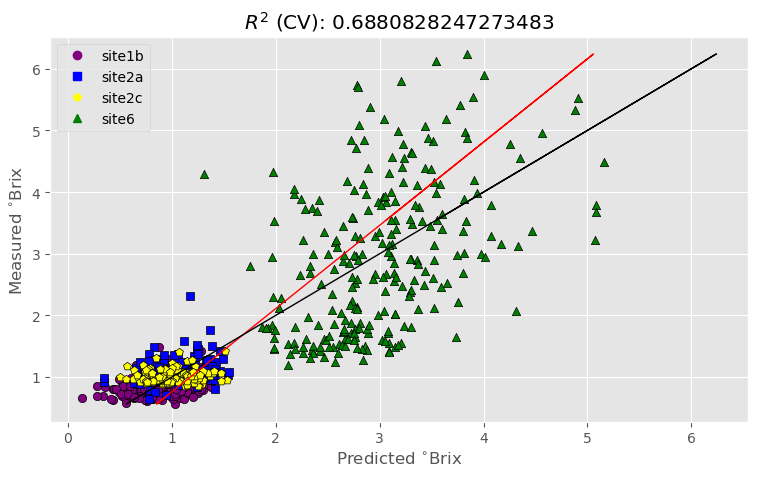

In [52]:
file_name_d13c_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,
                             y_d13c_std,
                             y_d13c_std_df_array,
                             ncomp_d13c_std, labels,file_name_d13c_std)

# d13c

In [32]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\std_d13c.npy',  allow_pickle=True)

In [26]:
y_d13c_max_df = pd.DataFrame(d13c_trait_pdf_ymax, columns=['y_value', 'filename'])
y_d13c_max_df['filename'] = y_d13c_max_df['filename'].str.replace('d13c_', '')

y_d13c_max_df['y_value'] = pd.to_numeric(y_d13c_max_df['y_value'])
y_d13c_max_df_array = y_d13c_max_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d13c_max_df = pd.merge(df_spectral, y_d13c_max_df, on='filename')
#  # Band columns as predictors
merged_y_d13c_max_df   
X_d13c_ymax = merged_y_d13c_max_df.filter(regex='^band_').values 
y_d13c_max = merged_y_d13c_max_df[['y_value']].values  

In [19]:
X_d13c_ymax.shape

(748, 425)

In [28]:
y_d13c_max_df_array[:,1]

array(['site1b_017_022_clipped.tif', 'site1b_017_032_clipped.tif',
       'site1b_018_016_clipped.tif', 'site1b_018_023_clipped.tif',
       'site1b_018_024_clipped.tif', 'site1b_018_027_clipped.tif',
       'site1b_019_016_clipped.tif', 'site1b_019_024_clipped.tif',
       'site1b_020_016_clipped.tif', 'site1b_020_017_clipped.tif',
       'site1b_020_025_clipped.tif', 'site1b_021_017_clipped.tif',
       'site1b_021_025_clipped.tif', 'site1b_021_026_clipped.tif',
       'site1b_022_025_clipped.tif', 'site1b_023_018_clipped.tif',
       'site1b_023_025_clipped.tif', 'site1b_023_038_clipped.tif',
       'site1b_023_039_clipped.tif', 'site1b_023_040_clipped.tif',
       'site1b_023_041_clipped.tif', 'site1b_023_042_clipped.tif',
       'site1b_024_022_clipped.tif', 'site1b_024_039_clipped.tif',
       'site1b_024_042_clipped.tif', 'site1b_025_032_clipped.tif',
       'site1b_026_027_clipped.tif', 'site1b_026_028_clipped.tif',
       'site1b_027_012_clipped.tif', 'site1b_027_019_clipped.t

In [20]:
# Call the model function
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max  = plot_mse_vs_components(X_d13c_ymax, y_d13c_max[:,0], 18)
# opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(X_d13c_std1, y_d13c_std1, 50)


18/18 components processed
Optimized number of PLS components: 17
Wavelengths to keep from index: 370
Optimized MSEP: 0.5050921048831619


R2 calib: 0.570
R2 CV: 0.436
MSE calib: 0.192
MSE CV: 0.251
-14.261375542386164 0.49846006528476994
None
0 site1b -28.45543039611033 [-28.11910781] site1b_017_022_clipped.tif
1 site1b -28.34552184409715 [-27.99790068] site1b_017_032_clipped.tif
2 site1b -28.254688388006876 [-28.56180336] site1b_018_016_clipped.tif
3 site1b -27.890532959523384 [-28.47396692] site1b_018_023_clipped.tif
4 site1b -28.233214483786526 [-28.71763821] site1b_018_024_clipped.tif
5 site1b -28.137311112326 [-28.63201749] site1b_018_027_clipped.tif
6 site1b -28.11096777910176 [-28.28223874] site1b_019_016_clipped.tif
7 site1b -28.058049281219805 [-28.35401533] site1b_019_024_clipped.tif
8 site1b -27.582035677771906 [-28.39602125] site1b_020_016_clipped.tif
9 site1b -28.04791086073996 [-28.91409827] site1b_020_017_clipped.tif
10 site1b -28.219524348605443 [-29.23080351] site1b_020_025_clipped.tif
11 site1b -28.26631451596045 [-28.64270737] site1b_021_017_clipped.tif
12 site1b -28.1056988806831 [-28.62547403] site1b

459 site2c -28.072052943547874 [-27.6233176] site2c_024_015_clipped.tif
460 site2c -27.825760120218934 [-27.57513938] site2c_024_016_clipped.tif
461 site2c -27.806644615897266 [-27.81570106] site2c_024_017_clipped.tif
462 site2c -27.81707227300883 [-27.83937587] site2c_024_018_clipped.tif
463 site2c -27.69412711886113 [-27.63324799] site2c_024_022_clipped.tif
464 site2c -27.789788466397336 [-28.0026659] site2c_024_023_clipped.tif
465 site2c -28.000307661889803 [-27.55523136] site2c_024_024_clipped.tif
466 site2c -28.621925109062055 [-28.03868189] site2c_024_026_clipped.tif
467 site2c -28.312988680633058 [-27.9564146] site2c_024_029_clipped.tif
468 site2c -28.18763401502401 [-28.03222755] site2c_024_030_clipped.tif
469 site2c -27.852488510357194 [-27.75969423] site2c_024_031_clipped.tif
470 site2c -27.812654712151563 [-27.40616381] site2c_025_022_clipped.tif
471 site2c -27.742886164332155 [-27.65744897] site2c_025_023_clipped.tif
472 site2c -27.82709508035699 [-27.48923273] site2c_025_0

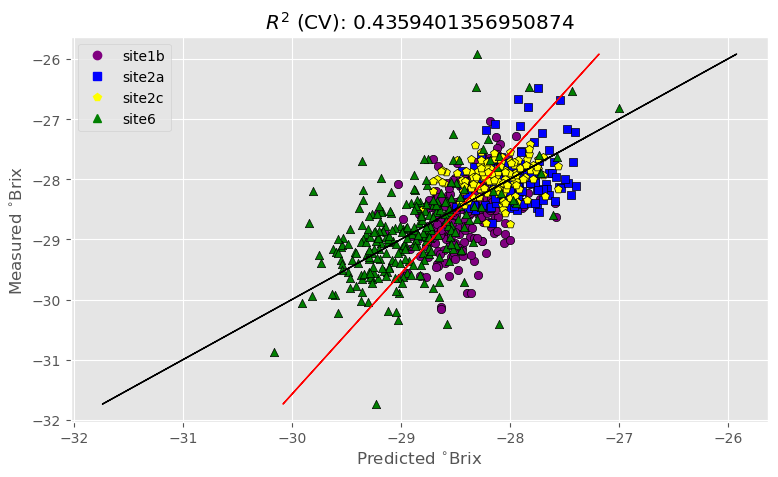

In [30]:
file_name_d13c_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\d13c_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max, y_d13c_max,y_d13c_max_df_array, ncomp_d13c_max, labels, file_name_d13c_max)

# d13 std

In [33]:
y_d13c_std_df = pd.DataFrame(d13c_trait_pdf_std, columns=['y_value', 'filename'])
y_d13c_std_df['filename'] = y_d13c_std_df['filename'].str.replace('d13c_', '')

y_d13c_std_df['y_value'] = pd.to_numeric(y_d13c_std_df['y_value'])

y_d13c_std_df_array = y_d13c_std_df.to_numpy()
# Merge y1_cleaned with df_spectral
merged_y_d13c_std_df = pd.merge(df_spectral, y_d13c_std_df, on='filename')
 # Band columns as predictors
    
X_d13c_std = merged_y_d13c_std_df.filter(regex='^band_').values 
y_d13c_std = merged_y_d13c_std_df[['y_value']].values  

In [34]:
print(X_d13c_std.shape, y_d13c_std.shape)

(748, 425) (748, 1)


In [35]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(X_d13c_std, y_d13c_std, 20)

20/20 components processed
Optimized number of PLS components: 14
Wavelengths to keep from index: 341
Optimized MSEP: 0.658102134392923


R2 calib: 0.761
R2 CV: 0.688
MSE calib: 0.334
MSE CV: 0.436
0.4371463289054486 0.7405336373072523
None
0 site1b 1.073136225940128 [0.70127318] site1b_017_022_clipped.tif
1 site1b 1.0320194012679875 [0.56048014] site1b_017_032_clipped.tif
2 site1b 0.7854773041043808 [0.92031818] site1b_018_016_clipped.tif
3 site1b 0.6605372403704617 [0.91948376] site1b_018_023_clipped.tif
4 site1b 0.6808692771625615 [0.68583749] site1b_018_024_clipped.tif
5 site1b 1.0002534092355198 [0.93719321] site1b_018_027_clipped.tif
6 site1b 1.1124075285716397 [0.67581055] site1b_019_016_clipped.tif
7 site1b 0.8712390488770401 [0.73837037] site1b_019_024_clipped.tif
8 site1b 0.9880703783813487 [0.78666208] site1b_020_016_clipped.tif
9 site1b 0.7193121170325998 [0.93292606] site1b_020_017_clipped.tif
10 site1b 0.7563139495151299 [0.88870304] site1b_020_025_clipped.tif
11 site1b 1.0916467097602778 [0.81722472] site1b_021_017_clipped.tif
12 site1b 0.7107470208983553 [0.71872903] site1b_021_025_clipped.tif
13 site1b 1

469 site2c 0.9032076696801785 [0.97003488] site2c_024_031_clipped.tif
470 site2c 1.4707062931458 [1.06456343] site2c_025_022_clipped.tif
471 site2c 1.0031331234485334 [0.94046497] site2c_025_023_clipped.tif
472 site2c 1.2581397435758894 [0.9878523] site2c_025_024_clipped.tif
473 site2c 1.213020719096737 [0.9662599] site2c_025_025_clipped.tif
474 site2c 0.8862410765248203 [1.13014485] site2c_025_026_clipped.tif
475 site2c 0.7534269333576371 [1.11958269] site2c_025_028_clipped.tif
476 site2c 0.8620827166072078 [0.95205921] site2c_025_030_clipped.tif
477 site2c 1.506765197039585 [1.41471197] site2c_026_022_clipped.tif
478 site2c 0.8213594921411195 [0.93513483] site2c_026_023_clipped.tif
479 site2c 1.4034449946248588 [1.09348849] site2c_026_024_clipped.tif
480 site2c 0.9065835222176064 [0.97357672] site2c_026_026_clipped.tif
481 site2c 0.5626150280539548 [0.96592117] site2c_026_027_clipped.tif
482 site2c 1.2269787900345783 [1.01260345] site2c_026_028_clipped.tif
483 site2c 1.29856011328315

Filenames meeting the conditions:
site6_025_037_clipped.tif
site6_026_036_clipped.tif
site6_031_030_clipped.tif
site6_033_026_clipped.tif


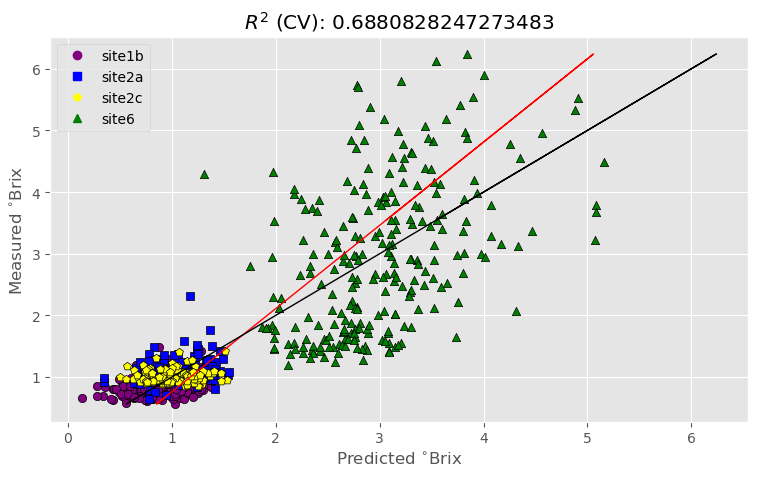

In [46]:
file_name_d13c_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,
                             y_d13c_std,
                             y_d13c_std_df_array,
                             ncomp_d13c_std, labels,file_name_d13c_std)

In [101]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_d13c_std, y_d13c_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d13c_std][wav_d13c_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(97,) (97,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.75123765,  0.47086128, -1.14891228, -0.61356492, -0.55592246,
        0.76746221, -0.78288668, -0.91440532, -0.07992538,  0.23790506,
       -1.0787358 , -0.32882069, -0.26340681, -0.06209026, -0.97924471,
       -0.84576425, -0.80787134,  0.34670278,  0.26869252,  0.08445761,
        1.11991098, -1.02876745, -1.10201886, -1.03926714, -0.61776357,
        1.25427691, -0.69378976, -0.81435383,  1.51673142,  1.05002659,
        0.55028571, -1.07768084,  0.87790966,  0.90685627,  0.66918669,
       -0.89463962, -0.40025062, -0.18786073, -0.4190451 , -0.62768171,
        0.68012136,  0.90123902,  1.19163553,  0.16572773, -0.68027775,
       -1.221056  , -1.67141034,  0.6259596 ,  0.74897312,  1.10817916,
        0.42589831, -1.07135526, -0.17457684,  1.40451759,  0.26018834,
        1.17683996,  0.48649331, -0.66496095,  0.74692697,  0.65585157,
       -1.0070635 ,  0.3287343 , -1.31864424, -1.00617669,  0.34092269,
        0.54156882, -0.40321738,  0.94827689, -0.97057888,  0.97

In [102]:
optimal_pls_sla.intercept_

array([2.38762773])

In [103]:
bands_sla

array(['band_97', 'band_216', 'band_252', 'band_19', 'band_83', 'band_30',
       'band_37', 'band_121', 'band_106', 'band_233', 'band_350',
       'band_270', 'band_28', 'band_157', 'band_88', 'band_174',
       'band_96', 'band_400', 'band_170', 'band_278', 'band_241',
       'band_384', 'band_364', 'band_365', 'band_279', 'band_137',
       'band_222', 'band_34', 'band_158', 'band_258', 'band_180',
       'band_249', 'band_380', 'band_118', 'band_91', 'band_171',
       'band_25', 'band_337', 'band_81', 'band_345', 'band_128',
       'band_52', 'band_59', 'band_45', 'band_221', 'band_334',
       'band_224', 'band_285', 'band_373', 'band_235', 'band_92',
       'band_251', 'band_265', 'band_26', 'band_165', 'band_94',
       'band_21', 'band_387', 'band_113', 'band_31', 'band_176',
       'band_50', 'band_156', 'band_173', 'band_71', 'band_404',
       'band_335', 'band_42', 'band_40', 'band_256', 'band_103',
       'band_44', 'band_145', 'band_226', 'band_65', 'band_381',
       'b

# d15n

In [25]:
d15n_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\std_d15n.npy',  allow_pickle=True)

In [26]:
y_d15n_max = np.array(d15n_trait_pdf_ymax)
y_d15n_std = np.array(d15n_trait_pdf_std)

In [27]:
y_d15n_max_df = pd.DataFrame(y_d15n_max, columns=['y_value', 'filename'])
y_d15n_max_df['filename'] = y_d15n_max_df['filename'].str.replace('d15n_', '')

y_d15n_max_df['y_value'] = pd.to_numeric(y_d15n_max_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_d15n_max_df = pd.merge(df_spectral, y_d15n_max_df, on='filename')
 # Band columns as predictors
    
X_d15n_ymax = merged_y_d15n_max_df.filter(regex='^band_').values 
y_d15n_max = merged_y_d15n_max_df[['y_value']].values  

In [28]:
y_d15n_std_df = pd.DataFrame(y_d15n_std, columns=['y_value', 'filename'])
y_d15n_std_df['filename'] = y_d15n_std_df['filename'].str.replace('d15n_', '')

y_d15n_std_df['y_value'] = pd.to_numeric(y_d15n_std_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_d15n_std_df = pd.merge(df_spectral, y_d15n_std_df, on='filename')
 # Band columns as predictors
    
X_d15n_std = merged_y_d15n_std_df.filter(regex='^band_').values 
y_d15n_std = merged_y_d15n_std_df[['y_value']].values  

In [29]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_max = y_d15n_max[0:250, :]
site2a_y_d15n_max = y_d15n_max[250:375, :]
site2c_y_d15n_max = y_d15n_max[375:500,:]
site6_y_d15n_max = y_d15n_max[500:800,:]



In [30]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_std = y_d15n_std[0:250, :]
site2a_y_d15n_std = y_d15n_std[250:375, :]
site2c_y_d15n_std = y_d15n_std[375:500,:]
site6_y_d15n_std = y_d15n_std[500:800,:]



In [31]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(X_d15n_ymax, y_d15n_max, 50)
x1_d15n_max = opt_Xc_d15n_max[0:250,:]
x2_d15n_max = opt_Xc_d15n_max[250:375,:]
x3_d15n_max = opt_Xc_d15n_max[375:500,:]
x4_d15n_max = opt_Xc_d15n_max[500:800,:]

y1_d15n_max = y_d15n_max[0:250,:]
y2_d15n_max = y_d15n_max[250:375,:]
y3_d15n_max = y_d15n_max[375:500,:]
y4_d15n_max = y_d15n_max[500:800,:]

50/50 components processed
Optimized number of PLS components: 24
Wavelengths to keep from index: 351
Optimized MSEP: 0.9522654737997104


R2 calib: 0.671
R2 CV: 0.485
MSE calib: 0.636
MSE CV: 0.993
-0.7914400387746189 0.5369555591462147
None
0 site1b -0.2749922775438143 [-0.61911728]
1 site1b -1.6557782873135483 [-0.92582861]
2 site1b -1.054440778228988 [-0.17882761]
3 site1b -0.8241426449543812 [-0.5769183]
4 site1b -1.2766523658262083 [-0.21633612]
5 site1b -1.1766635120476248 [-0.62317354]
6 site1b -0.11307246475545751 [-0.53736412]
7 site1b -0.8173135893721653 [-0.71521616]
8 site1b -0.9756036518515105 [-0.97966608]
9 site1b -0.5018214073338636 [-0.47086768]
10 site1b -1.4063587837846891 [-0.34428493]
11 site1b -0.09627330842150306 [-1.18945824]
12 site1b -1.3276948132944582 [-0.20934926]
13 site1b -1.3274501607485472 [-0.42203469]
14 site1b -0.7156685114631283 [-0.27451529]
15 site1b -0.6027260418704841 [-0.90430279]
16 site1b -0.7309915409646552 [-0.93839942]
17 site1b -0.7839848478652622 [-0.83592687]
18 site1b -0.42050041912596914 [-0.61025976]
19 site1b -1.1637911188887031 [-0.37142747]
20 site1b -0.995816793694

522 site6 -2.6484647285962204 [-2.6381348]
523 site6 -3.684607666045409 [-3.68571447]
524 site6 -3.744146954705738 [-3.7581066]
525 site6 -3.334914746889217 [-3.06187478]
526 site6 -2.9433184385727658 [-3.97120679]
527 site6 -2.3708547959107826 [-3.49765829]
528 site6 -3.804027072853326 [-1.74296643]
529 site6 -3.034318124000493 [-1.8289908]
530 site6 -2.4588813250875172 [-1.61201602]
531 site6 -3.1146390892020044 [-3.62181605]
532 site6 -3.5157674865355006 [-3.57673347]
533 site6 -4.254880964208233 [-2.83341423]
534 site6 -3.32030166691765 [-3.3109322]
535 site6 -3.515976837974942 [-3.69130158]
536 site6 -2.072616662459892 [-2.73761841]
537 site6 -3.1443343497722958 [-2.2692393]
538 site6 -3.66986399423446 [-2.68627718]
539 site6 -2.3913024676312324 [-2.85252033]
540 site6 -2.5500362773456486 [-3.92511099]
541 site6 -2.861985188415848 [-3.20535306]
542 site6 -3.5955848370454997 [-2.99918181]
543 site6 -4.000044303076339 [-2.63711447]
544 site6 -2.8815857235392275 [-1.46740036]
545 sit

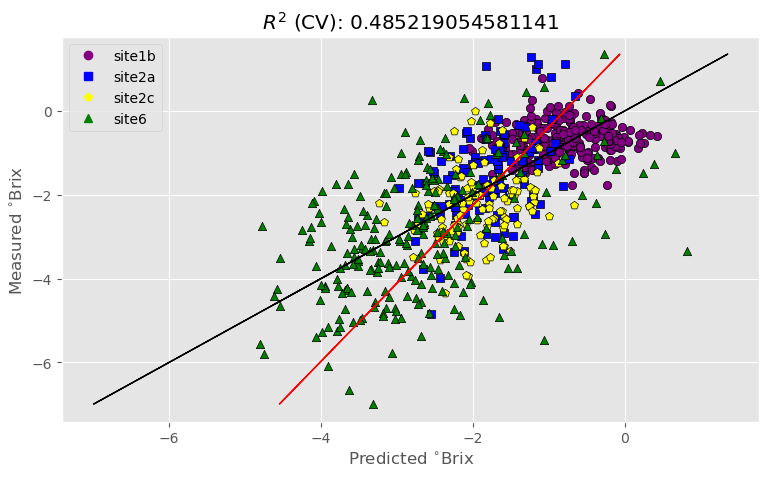

In [32]:
file_name_d15n_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\d15n_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
                             y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
                             ncomp_d15n_max, labels, file_name_d15n_max)

In [92]:
optimal_pls_sla  = PLSRegression(n_components=9)
optimal_pls_sla.fit(opt_Xc_d15n_max, y_d15n_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d15n_max][wav_d15n_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(39,) (39,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 7.70761835, -4.56931117,  3.8664678 ,  5.5828807 , -2.64193492,
        1.67711686,  2.46154748,  4.23893395, -1.53427499, -2.11330758,
       -2.99587668,  2.68184217,  5.16603244, -4.66879534,  1.13396169,
       -2.57218075, -2.29509841, -3.04130112, -4.93472795, -0.44706324,
       -3.37776257, -3.84772031,  3.33273799, -0.41994267,  0.3137268 ,
       -4.75306434,  0.44633032, -3.1245154 , -4.90181274,  4.06621517,
       -2.29588361,  3.49212845,  7.40060186, -2.24637484,  6.53928042,
        3.2730217 , -5.68860762,  5.15904503, -4.98837705])

In [93]:
optimal_pls_sla.intercept_

array([-2.84931067])

In [94]:
bands_sla

array(['band_230', 'band_19', 'band_22', 'band_344', 'band_261',
       'band_404', 'band_385', 'band_160', 'band_273', 'band_69',
       'band_27', 'band_157', 'band_44', 'band_184', 'band_74',
       'band_223', 'band_269', 'band_259', 'band_370', 'band_221',
       'band_70', 'band_43', 'band_285', 'band_401', 'band_113',
       'band_270', 'band_156', 'band_107', 'band_37', 'band_166',
       'band_67', 'band_72', 'band_84', 'band_216', 'band_397', 'band_36',
       'band_114', 'band_30', 'band_329'], dtype='<U8')

In [33]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(X_d15n_std, y_d15n_std, 50)



50/50 components processed
Optimized number of PLS components: 13
Wavelengths to keep from index: 332
Optimized MSEP: 0.5081469400924064


R2 calib: 0.838
R2 CV: 0.734
MSE calib: 0.132
MSE CV: 0.216
0.6334490834102944 0.720069564947876
None
0 site1b 1.4534559313679731 [1.20773023]
1 site1b 1.4752116140121625 [1.121059]
2 site1b 1.6636847156131538 [1.35270672]
3 site1b 1.5913307230108544 [1.18648688]
4 site1b 1.4528929630867389 [1.19258431]
5 site1b 1.4746311890533466 [1.16755199]
6 site1b 1.6085657411396008 [1.10736171]
7 site1b 1.3938815210683935 [1.02763909]
8 site1b 1.9086291823446726 [1.20248549]
9 site1b 1.4754095907780402 [1.65738306]
10 site1b 1.5595974337655447 [1.16611972]
11 site1b 1.5436103491484028 [1.53777045]
12 site1b 1.542873287794168 [1.23975699]
13 site1b 1.6737472254693768 [1.0857994]
14 site1b 1.5678572457404918 [1.35680062]
15 site1b 1.7826103078516435 [1.28846199]
16 site1b 1.708517595612411 [1.12209159]
17 site1b 1.5758488568792957 [1.243521]
18 site1b 1.4709524305026036 [1.33629822]
19 site1b 1.4951970607695968 [1.35366626]
20 site1b 1.283030458562299 [1.20940027]
21 site1b 1.2018254740119725 [1.29

540 site6 2.933784185416494 [2.36174075]
541 site6 2.745627959583228 [2.38328336]
542 site6 2.7171953731735337 [2.76260753]
543 site6 2.9953411394498484 [2.78070233]
544 site6 3.198459228124724 [2.13324934]
545 site6 3.42622169391278 [2.79248379]
546 site6 2.965774137647865 [2.9455841]
547 site6 3.1841601332734086 [3.06534846]
548 site6 3.104771892162327 [2.45791298]
549 site6 3.1673760042455017 [2.6375285]
550 site6 2.8069111859265408 [2.63273753]
551 site6 2.812540348370132 [2.96781581]
552 site6 3.0427296966477053 [2.77200715]
553 site6 3.2863463830155375 [2.59721626]
554 site6 3.249401215633671 [2.84925922]
555 site6 3.1891806948631856 [2.82834416]
556 site6 3.300340086467557 [2.46546949]
557 site6 3.117106154102054 [3.03710787]
558 site6 2.9346569737013084 [3.52759715]
559 site6 2.832727789891204 [2.84548274]
560 site6 3.4403876255024253 [3.14840546]
561 site6 3.067626151897455 [3.45061611]
562 site6 3.228280861536657 [2.61741307]
563 site6 3.317436932257136 [2.90995476]
564 site6

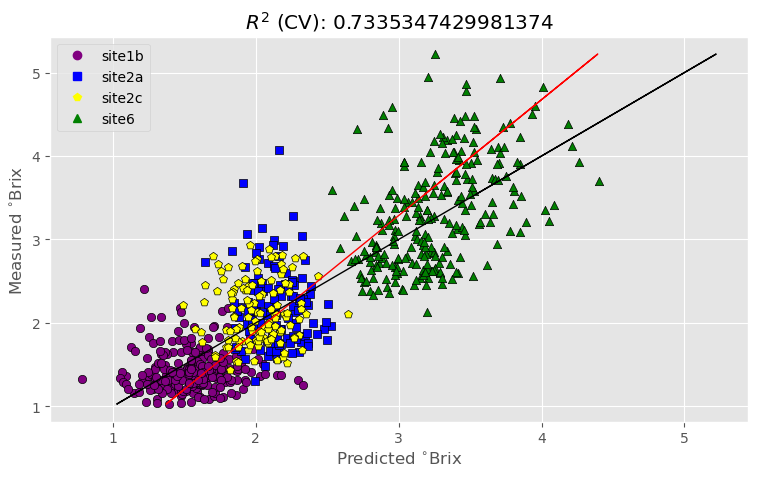

In [36]:
x1_d15n_std = opt_Xc_d15n_std[0:250,:]
x2_d15n_std = opt_Xc_d15n_std[250:375,:]
x3_d15n_std = opt_Xc_d15n_std[375:500,:]
x4_d15n_std = opt_Xc_d15n_std[500:800,:]

y1_d15n_std = y_d15n_std[0:250,:]
y2_d15n_std = y_d15n_std[250:375,:]
y3_d15n_std = y_d15n_std[375:500,:]
y4_d15n_std = y_d15n_std[500:800,:]


file_name_d15n_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\d15n_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
                             y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
                             ncomp_d15n_std, labels, file_name_d15n_std)

In [95]:
optimal_pls_sla  = PLSRegression(n_components=11)
optimal_pls_sla.fit(opt_Xc_d15n_std, y_d15n_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_d15n_std][wav_d15n_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(55,) (55,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-3.72169856,  1.77502189,  1.98511403,  1.6625865 , -0.9069081 ,
       -1.23955595, -1.63329838, -0.12481896,  0.71792859, -2.54058605,
       -3.12256538, -1.54415735, -0.60167455,  1.69765996,  1.10876775,
       -2.54472738, -3.20064696,  1.88144186,  1.07518406,  3.32117439,
       -1.55407194,  0.97943531,  1.19043668,  1.45735009, -3.08505135,
       -3.70500651, -0.84244557,  1.98476595, -3.75221925,  0.85603229,
        3.55322827,  1.2322897 ,  0.87541617,  2.75432884,  1.81119045,
        1.95628535, -2.84671758,  1.44808788,  0.41305469, -0.68083463,
        1.36128421,  2.74804227,  2.67591495, -2.55666303,  1.80184549,
       -2.28839626,  1.77454505,  3.87418688,  2.99387509, -4.61638133,
       -2.43783295,  1.56392768, -2.65167328,  2.0238401 , -3.94731628])

In [96]:
optimal_pls_sla.intercept_

array([4.39998395])

In [97]:
bands_sla

array(['band_34', 'band_50', 'band_85', 'band_236', 'band_46', 'band_108',
       'band_178', 'band_106', 'band_180', 'band_160', 'band_361',
       'band_89', 'band_47', 'band_165', 'band_30', 'band_222',
       'band_105', 'band_389', 'band_162', 'band_398', 'band_48',
       'band_258', 'band_116', 'band_226', 'band_365', 'band_352',
       'band_155', 'band_371', 'band_146', 'band_37', 'band_223',
       'band_285', 'band_327', 'band_125', 'band_26', 'band_113',
       'band_357', 'band_216', 'band_117', 'band_185', 'band_21',
       'band_94', 'band_42', 'band_23', 'band_103', 'band_156',
       'band_149', 'band_225', 'band_104', 'band_364', 'band_220',
       'band_153', 'band_176', 'band_391', 'band_93'], dtype='<U8')

# LA

In [37]:
la_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\std_la.npy',  allow_pickle=True)

In [38]:
y_la_max = np.array(la_trait_pdf_ymax)

y_la_std = np.array(la_trait_pdf_std)

In [39]:
y_la_max_df = pd.DataFrame(y_la_max, columns=['y_value', 'filename'])
y_la_max_df['filename'] = y_la_max_df['filename'].str.replace('la_', '')

y_la_max_df['y_value'] = pd.to_numeric(y_la_max_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_la_max_df = pd.merge(df_spectral, y_la_max_df, on='filename')
 # Band columns as predictors
    
X_la_ymax = merged_y_la_max_df.filter(regex='^band_').values 
y_la_max = merged_y_la_max_df[['y_value']].values  

In [40]:
y_la_std_df = pd.DataFrame(y_la_std, columns=['y_value', 'filename'])
y_la_std_df['filename'] = y_la_std_df['filename'].str.replace('la_', '')

y_la_std_df['y_value'] = pd.to_numeric(y_la_std_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_la_std_df = pd.merge(df_spectral, y_la_std_df, on='filename')
 # Band columns as predictors
    
X_la_std = merged_y_la_std_df.filter(regex='^band_').values 
y_la_std = merged_y_la_std_df[['y_value']].values  

In [41]:
# vertically stack two section of arrays to create a new array
site1b_y_la_max = y_la_max[0:250, :]
site2a_y_la_max = y_la_max[250:375, :]
site2c_y_la_max = y_la_max[375:500,:]
site6_y_la_max = y_la_max[500:800,:]
# # site6_y_la_max1_2 = y_la_max1[3394:3574,:]
# y_la_max = np.vstack((site1b_y_la_max1, site2a_y_la_max1,site2c_y_la_max1,site6_y_la_max1_1))
# # site2c_x = x[]
# y_la_max.shape

In [42]:
# vertically stack two section of arrays to create a new array
site1b_y_la_std = y_la_std[0:250, :]
site2a_y_la_std = y_la_std[250:375, :]
site2c_y_la_std = y_la_std[375:500,:]
site6_y_la_std = y_la_std[500:800,:]

# y_la_std = np.vstack((site1b_y_la_std1, site2a_y_la_std1,site2c_y_la_std1,site6_y_la_std1_1))
# # site2c_x = x[]
# y_la_std.shape

50/50 components processed
Optimized number of PLS components: 21
Wavelengths to keep from index: 351
Optimized MSEP: 1.025203356767139
R2 calib: 0.612
R2 CV: 0.306
MSE calib: 0.572
MSE CV: 1.021
1.3109931777141464 0.43932930858776437
None
0 site1b 1.791356385513207 [2.33731394]
1 site1b 2.841676990984456 [2.09131227]
2 site1b 2.666011831833739 [2.00573024]
3 site1b 3.26366333045082 [2.11948957]
4 site1b 2.350561627266077 [2.33295208]
5 site1b 2.8612071881956256 [1.91542567]
6 site1b 1.9768626489964216 [2.08051101]
7 site1b 2.9178257497211133 [2.12108104]
8 site1b 3.1107030412220213 [1.98030887]
9 site1b 2.350898551294738 [2.1685119]
10 site1b 3.2786243951979595 [2.24154199]
11 site1b 1.7202832111143813 [2.18444854]
12 site1b 2.7317069871715587 [2.56594987]
13 site1b 3.2885580759592434 [2.31679871]
14 site1b 2.7440049404038875 [2.5390464]
15 site1b 4.131665336335277 [2.11618603]
16 site1b 3.1531687891275224 [2.20572111]
17 site1b 3.313172677761605 [1.91174722]
18 site1b 2.6664146055504

628 site6 1.606555380239023 [2.67839059]
629 site6 1.8154712598868477 [1.15770663]
630 site6 2.0476307316013673 [2.63056598]
631 site6 2.662960002943925 [2.06456484]
632 site6 1.7487307317344056 [-0.01022253]
633 site6 1.6668454635463874 [0.91691088]
634 site6 1.289960398873681 [1.97511782]
635 site6 1.164600249008771 [1.49782619]
636 site6 0.9680276704650153 [-1.68084659]
637 site6 2.312623182418486 [0.91742089]
638 site6 0.8899535461424604 [2.0915621]
639 site6 1.6739454920707515 [1.96855389]
640 site6 1.4629856583739862 [-1.86686457]
641 site6 0.8375477325737006 [1.09398276]
642 site6 1.5715317341974413 [1.92367799]
643 site6 1.2746893945330042 [-0.99834381]
644 site6 1.5234285261593248 [1.41283405]
645 site6 2.489261402481188 [2.10171535]
646 site6 1.7138273711781342 [2.55406497]
647 site6 1.0968417264821788 [2.49883643]
648 site6 2.0712508441976767 [1.8821604]
649 site6 1.7303674598682888 [2.27467695]
650 site6 1.3033422954777325 [3.32699384]
651 site6 1.4484408718870234 [2.455514

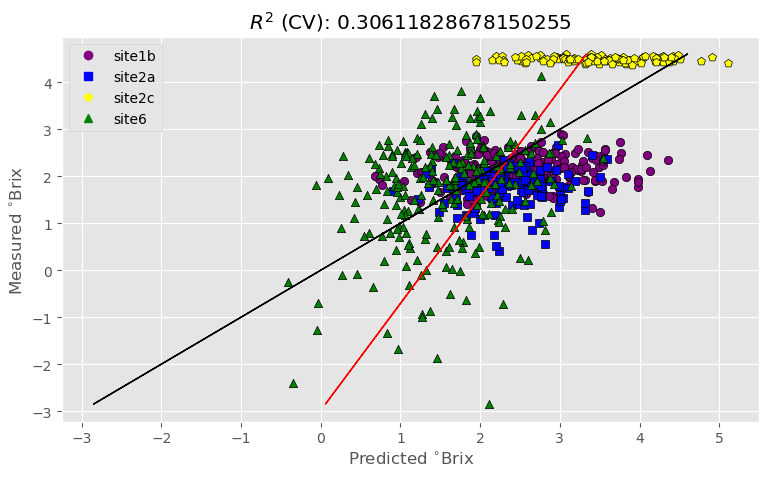

In [43]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(X_la_ymax, y_la_max, 50)
x1_la_max = opt_Xc_la_max[0:250,:]
x2_la_max = opt_Xc_la_max[250:375,:]
x3_la_max = opt_Xc_la_max[375:500,:]
x4_la_max = opt_Xc_la_max[500:800,:]

y1_la_max = y_la_max[0:250,:]
y2_la_max = y_la_max[250:375,:]
y3_la_max = y_la_max[375:500,:]
y4_la_max = y_la_max[500:800,:]
file_name_la_max = 'E:/wenqu/model_csv_point/la_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
                             y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
                             ncomp_la_max, labels,file_name_la_max)

In [86]:
optimal_pls_sla  = PLSRegression(n_components=19)
optimal_pls_sla.fit(opt_Xc_la_max, y_la_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_la_max][wav_la_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(88,) (88,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 1.75285454, -0.09353504,  3.35968302, -4.79750775, -1.90138276,
        1.08592219,  2.18472639, -2.69740573, -4.16642233,  1.40062827,
       -2.93896538,  8.48439809,  3.91823394,  4.62993066,  1.26365743,
        1.17142931, -1.81704931,  1.73433752,  0.90135354, -6.96191986,
       -2.57902617,  5.11240598,  1.16564195,  0.97892114, -2.44717742,
        0.66909489, -2.32940489, -2.38671987, -6.73545177,  1.24607133,
       -1.42022503, -7.61015355, -6.23097034,  0.94673031,  3.11868864,
       -2.28626749, -2.14548562,  3.23551759,  4.59183063, -4.82393424,
        0.86154284, -4.79553311,  3.97859784, -5.15518248, -3.19056319,
       -2.69870887,  5.5475196 ,  3.22742113, -4.73986311, -1.68134953,
        1.57442236, -7.64670305,  2.99877549, -2.22022623,  5.25522565,
        3.63746677, -1.6931033 ,  4.67306829, -2.86427087,  2.33451316,
       -5.82044036,  4.4405991 ,  3.97216192,  1.932878  ,  1.0078493 ,
       -6.40691696,  3.04038648, -2.0349588 , -5.65902381, -5.04

In [87]:
bands_sla

array(['band_399', 'band_346', 'band_181', 'band_90', 'band_404',
       'band_352', 'band_372', 'band_110', 'band_146', 'band_217',
       'band_339', 'band_260', 'band_143', 'band_258', 'band_277',
       'band_248', 'band_381', 'band_336', 'band_54', 'band_236',
       'band_30', 'band_100', 'band_347', 'band_102', 'band_28',
       'band_96', 'band_255', 'band_373', 'band_249', 'band_40',
       'band_61', 'band_360', 'band_233', 'band_271', 'band_221',
       'band_284', 'band_51', 'band_18', 'band_281', 'band_108',
       'band_229', 'band_245', 'band_259', 'band_367', 'band_81',
       'band_285', 'band_254', 'band_124', 'band_87', 'band_45',
       'band_218', 'band_272', 'band_391', 'band_397', 'band_125',
       'band_114', 'band_172', 'band_364', 'band_344', 'band_383',
       'band_84', 'band_262', 'band_223', 'band_147', 'band_25',
       'band_135', 'band_43', 'band_162', 'band_168', 'band_230',
       'band_130', 'band_176', 'band_86', 'band_37', 'band_109',
       'band

In [88]:
optimal_pls_sla.intercept_

array([2.16566616])

50/50 components processed
Optimized number of PLS components: 25
Wavelengths to keep from index: 372
Optimized MSEP: 0.3846023919447931
R2 calib: 0.890
R2 CV: 0.823
MSE calib: 0.084
MSE CV: 0.135
0.20278586371964835 0.8249881236854513
None
0 site1b 0.5024954596469835 [0.58358807]
1 site1b 0.5072796345282649 [0.64322855]
2 site1b 0.5324198901008483 [0.72511388]
3 site1b 0.27796448867875134 [0.70230115]
4 site1b 0.8362014584583981 [0.71998915]
5 site1b 0.6025384271610832 [0.60862438]
6 site1b 0.6876587720722058 [0.65601376]
7 site1b 0.3970120930606018 [0.69665911]
8 site1b 0.4960719413122623 [0.7205598]
9 site1b 0.3999054416001726 [0.84827718]
10 site1b 0.4427457801468939 [0.78289797]
11 site1b 0.7789078979425301 [0.77106682]
12 site1b 0.6205602135049693 [0.59486973]
13 site1b 0.6235947556526946 [0.60111296]
14 site1b 0.8082498053829197 [0.59497777]
15 site1b 0.2015009172541331 [0.77452628]
16 site1b 0.831106101861528 [0.53759613]
17 site1b 0.7235160653724148 [0.76257989]
18 site1b 0.64

599 site6 2.2861335728219476 [1.91344167]
600 site6 1.9042654499490324 [1.72896263]
601 site6 2.299726076741033 [2.51803295]
602 site6 2.3544465948205393 [2.21281784]
603 site6 2.2649028172381955 [1.83239219]
604 site6 2.3217475290009606 [2.21608608]
605 site6 2.0261204042938976 [3.20163054]
606 site6 2.1051013003347325 [1.91299103]
607 site6 1.9297062005187982 [1.42252597]
608 site6 1.7040403101128043 [2.4097312]
609 site6 1.6292599085340997 [2.07092411]
610 site6 2.2773531502202977 [2.19820193]
611 site6 2.109466543140914 [2.77265965]
612 site6 2.2239914167163377 [2.32648849]
613 site6 1.941900906291469 [2.26471831]
614 site6 2.1418567932064985 [2.42563975]
615 site6 2.094340812081226 [2.42097808]
616 site6 2.068824863035049 [2.36805419]
617 site6 1.567337497699928 [2.07993028]
618 site6 2.2803179544322267 [2.76228112]
619 site6 2.1622022243173316 [2.4661097]
620 site6 2.144894254199509 [1.71306743]
621 site6 2.592387814432052 [2.80446054]
622 site6 2.2040007596827094 [3.20857942]
62

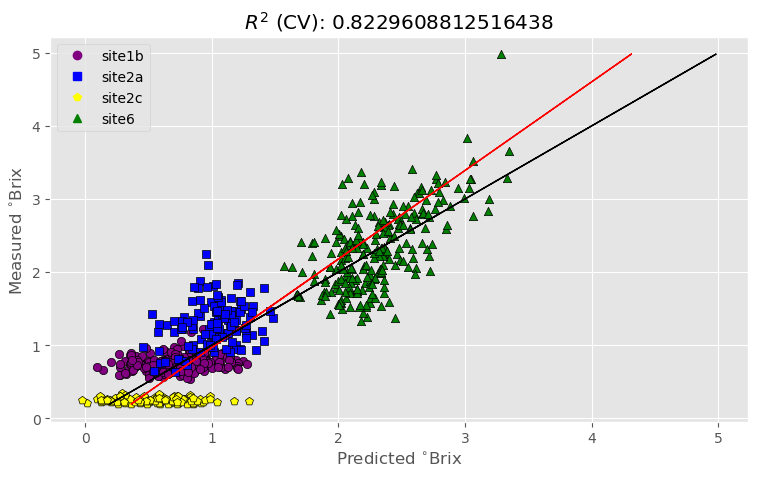

In [44]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(X_la_std, y_la_std, 50)

x1_la_std = opt_Xc_la_std[0:250,:]
x2_la_std = opt_Xc_la_std[250:375,:]
x3_la_std = opt_Xc_la_std[375:500,:]
x4_la_std = opt_Xc_la_std[500:800,:]

y1_la_std = y_la_std[0:250,:]
y2_la_std = y_la_std[250:375,:]
y3_la_std = y_la_std[375:500,:]
y4_la_std = y_la_std[500:800,:]
file_name_la_std = 'E:/wenqu/model_csv_point/la_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
                             y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
                             ncomp_la_std, labels, file_name_la_std)

In [89]:
optimal_pls_sla  = PLSRegression(n_components=18)
optimal_pls_sla.fit(opt_Xc_la_std, y_la_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_la_std][wav_la_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(129,) (129,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.65296949,  1.59327291,  0.69025653,  1.50291917, -0.77829718,
       -1.34408709,  2.20157634, -1.21908176, -0.41304464, -1.48747803,
       -2.01299788,  0.0099413 ,  0.71480293,  0.4300157 ,  0.54373745,
       -1.1094226 ,  1.14438998, -0.62036205,  1.07708961, -1.83974418,
        0.96055242,  0.0424396 , -0.6107626 , -1.53693393,  0.72601938,
       -1.03962951,  1.47002477, -1.25203963, -0.60397182,  0.98953414,
        1.40440365, -1.41201505,  1.22219776, -0.71018459, -1.20641443,
       -0.48970192,  1.50645574, -0.87903792,  0.92947659, -1.46208276,
       -2.00952374,  1.60937056,  0.63326806, -1.55772341,  0.40996914,
       -1.20133463, -0.07414033, -0.91021635,  2.12179114,  1.6692057 ,
       -2.11026357,  1.80077059, -1.46840897,  0.64674239,  1.00221099,
       -0.34974488, -1.93960432, -1.20804826,  0.04690975, -1.50002224,
        1.23752471,  1.28191508,  1.46873888, -1.45899443,  1.22596089,
        2.61606675, -1.94169988,  1.33645015, -1.39502237,  2.00

In [90]:
bands_sla

array(['band_126', 'band_180', 'band_69', 'band_385', 'band_79',
       'band_132', 'band_236', 'band_350', 'band_249', 'band_157',
       'band_250', 'band_86', 'band_348', 'band_339', 'band_389',
       'band_151', 'band_28', 'band_95', 'band_261', 'band_51',
       'band_141', 'band_90', 'band_387', 'band_246', 'band_404',
       'band_164', 'band_71', 'band_383', 'band_114', 'band_152',
       'band_374', 'band_337', 'band_54', 'band_354', 'band_63',
       'band_184', 'band_133', 'band_349', 'band_382', 'band_388',
       'band_245', 'band_42', 'band_147', 'band_97', 'band_344',
       'band_40', 'band_48', 'band_396', 'band_273', 'band_161',
       'band_232', 'band_391', 'band_234', 'band_24', 'band_148',
       'band_171', 'band_222', 'band_67', 'band_247', 'band_278',
       'band_72', 'band_336', 'band_125', 'band_185', 'band_27',
       'band_166', 'band_366', 'band_225', 'band_252', 'band_102',
       'band_270', 'band_20', 'band_398', 'band_365', 'band_342',
       'band_8

In [91]:
optimal_pls_sla.intercept_

array([2.69898437])

# SLA

In [45]:
sla_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\std_sla.npy',  allow_pickle=True)

In [46]:
y_sla_max = np.array(sla_trait_pdf_ymax)
y_sla_std = np.array(sla_trait_pdf_std)

In [47]:
y_sla_max_df = pd.DataFrame(y_sla_max, columns=['y_value', 'filename'])
y_sla_max_df['filename'] = y_sla_max_df['filename'].str.replace('sla_', '')

y_sla_max_df['y_value'] = pd.to_numeric(y_sla_max_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_sla_max_df = pd.merge(df_spectral, y_sla_max_df, on='filename')
 # Band columns as predictors
    
X_sla_ymax = merged_y_sla_max_df.filter(regex='^band_').values 
y_sla_max = merged_y_sla_max_df[['y_value']].values  

In [48]:
y_sla_std_df = pd.DataFrame(y_sla_std, columns=['y_value', 'filename'])
y_sla_std_df['filename'] = y_sla_std_df['filename'].str.replace('sla_', '')

y_sla_std_df['y_value'] = pd.to_numeric(y_sla_std_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_sla_std_df = pd.merge(df_spectral, y_sla_std_df, on='filename')
 # Band columns as predictors
    
X_sla_std = merged_y_sla_std_df.filter(regex='^band_').values 
y_sla_std = merged_y_sla_std_df[['y_value']].values  

In [49]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_max = y_sla_max[0:250, :]
site2a_y_sla_max = y_sla_max[250:375, :]
site2c_y_sla_max = y_sla_max[375:500,:]
site6_y_sla_max= y_sla_max[500:800,:]


In [50]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_std = y_sla_std[0:250, :]
site2a_y_sla_std = y_sla_std[250:375, :]
site2c_y_sla_std = y_sla_std[375:500,:]
site6_y_sla_std = y_sla_std[500:800,:]


50/50 components processed
Optimized number of PLS components: 15
Wavelengths to keep from index: 371
Optimized MSEP: 0.07557192683559787
R2 calib: 0.673
R2 CV: 0.583
MSE calib: 0.004
MSE CV: 0.005
1.7214738963739986 0.6231438067830957
None
0 site1b 4.56523234455909 [4.62279171]
1 site1b 4.542131539129239 [4.71890335]
2 site1b 4.562436766306773 [4.64792508]
3 site1b 4.53104098300952 [4.59101125]
4 site1b 4.549527455230117 [4.63353168]
5 site1b 4.54347287082156 [4.53297536]
6 site1b 4.520547197360027 [4.65337417]
7 site1b 4.530700383513139 [4.58858379]
8 site1b 4.495408962778667 [4.70256663]
9 site1b 4.555354253945451 [4.69003835]
10 site1b 4.545072606214869 [4.56848738]
11 site1b 4.524967914352531 [4.61535224]
12 site1b 4.528954894505751 [4.59749317]
13 site1b 4.603220933934297 [4.67483655]
14 site1b 4.5191052412719594 [4.50571512]
15 site1b 4.525016549046119 [4.63468425]
16 site1b 4.558285792714709 [4.56996334]
17 site1b 4.589752022462061 [4.5500127]
18 site1b 4.541413828608654 [4.554

724 site6 4.760617195447068 [4.86244518]
725 site6 4.737437398863452 [4.8144526]
726 site6 4.577225684034774 [4.53458516]
727 site6 4.5871164460797615 [4.6455533]
728 site6 4.64258789867724 [4.65680215]
729 site6 4.64872324309067 [4.8116412]
730 site6 4.708176074001903 [4.7250932]
731 site6 4.737965424992759 [4.5231167]
732 site6 4.696521745690225 [4.82017621]
733 site6 4.700846623461305 [4.56730539]
734 site6 4.760150275144929 [4.8518135]
735 site6 4.762452290040671 [4.82016896]
736 site6 4.645810433361193 [4.77252138]
737 site6 4.667189978691301 [4.73754692]
738 site6 4.715619491912427 [4.81893946]
739 site6 4.668090778369098 [4.728235]
740 site6 4.7253416054886195 [4.83413543]
741 site6 4.657303247409596 [4.48858332]
742 site6 4.6625844468461795 [4.53630854]
743 site6 4.650520970400251 [4.67761296]
744 site6 4.656326823841009 [4.58716831]
745 site6 4.737489846463619 [4.75061561]
746 site6 4.597124403683947 [4.4649631]
747 site6 4.602377496929245 [4.50274445]


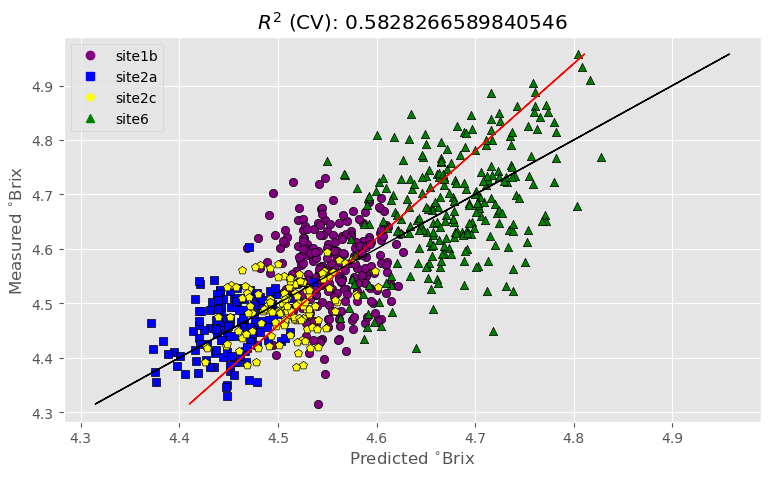

In [51]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(X_sla_ymax, y_sla_max, 50)
x1_sla_max = opt_Xc_sla_max[0:250,:]
x2_sla_max = opt_Xc_sla_max[250:375,:]
x3_sla_max = opt_Xc_sla_max[375:500,:]
x4_sla_max = opt_Xc_sla_max[500:800,:]

y1_sla_max = y_sla_max[0:250,:]
y2_sla_max = y_sla_max[250:375,:]
y3_sla_max = y_sla_max[375:500,:]
y4_sla_max = y_sla_max[500:800,:]
file_name_sla_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\sla_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
                             y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
                             ncomp_sla_max, labels, file_name_sla_max)

In [67]:
band_name = np.array(band_name)

In [68]:
optimal_pls_sla  = PLSRegression(n_components=12)
optimal_pls_sla.fit(opt_Xc_sla_max, y_sla_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_max][wav_sla_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(55,) (55,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.43090925, -0.43734835, -0.51720753,  0.21106365,  0.42129813,
        0.68082749, -0.4088075 , -0.20110669, -0.50629693, -0.30237352,
       -0.02697818,  0.05293824,  0.48622338, -0.28536429,  0.38045601,
        0.72786108,  0.37533292, -0.11928212, -0.30228775,  0.25996635,
        0.14444065, -0.03448292, -0.086752  , -0.05635968, -0.280217  ,
       -0.4539666 ,  0.29069058, -0.08507443, -0.51598785, -0.31804187,
       -0.16962672,  0.25555752, -0.39054922,  0.63758363, -0.5143918 ,
        0.26712089, -0.18910269, -0.10365199,  0.27017044, -0.24583171,
        0.19145972,  0.43566906, -0.29386076, -0.47982013,  0.40075471,
       -0.47851394,  0.37135019,  0.40600769, -0.62572387,  0.36552155,
        0.21786092,  0.13038004,  0.28007374,  0.20681684, -0.51025249])

In [69]:
optimal_pls_sla.intercept_

array([4.60784135])

In [70]:
bands_sla

array(['band_279', 'band_135', 'band_339', 'band_176', 'band_248',
       'band_246', 'band_232', 'band_30', 'band_230', 'band_237',
       'band_153', 'band_124', 'band_356', 'band_177', 'band_223',
       'band_125', 'band_40', 'band_373', 'band_93', 'band_216',
       'band_61', 'band_389', 'band_242', 'band_89', 'band_384',
       'band_355', 'band_331', 'band_36', 'band_119', 'band_62',
       'band_170', 'band_47', 'band_84', 'band_184', 'band_236',
       'band_100', 'band_155', 'band_154', 'band_70', 'band_338',
       'band_393', 'band_399', 'band_174', 'band_72', 'band_336',
       'band_22', 'band_69', 'band_102', 'band_376', 'band_27', 'band_17',
       'band_19', 'band_114', 'band_394', 'band_44'], dtype='<U8')

In [52]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(X_sla_std, y_sla_std, 50)

x1_sla_std = opt_Xc_sla_std[0:250,:]
x2_sla_std = opt_Xc_sla_std[250:375,:]
x3_sla_std = opt_Xc_sla_std[375:500,:]
x4_sla_std = opt_Xc_sla_std[500:800,:]



50/50 components processed
Optimized number of PLS components: 17
Wavelengths to keep from index: 314
Optimized MSEP: 0.06910426890809969


R2 calib: 0.908
R2 CV: 0.850
MSE calib: 0.002
MSE CV: 0.003
0.04176986931277435 0.8673521346292083
None
0 site1b 0.18775166051915826 [0.1508878]
1 site1b 0.22620473263018737 [0.16714962]
2 site1b 0.19345028362595607 [0.17577962]
3 site1b 0.18869048774379926 [0.1639507]
4 site1b 0.22067131066808432 [0.17203476]
5 site1b 0.19634248613023997 [0.19159607]
6 site1b 0.21229135283431433 [0.17768757]
7 site1b 0.1986833860247691 [0.15373474]
8 site1b 0.21979254543511317 [0.16480938]
9 site1b 0.14670242039012493 [0.1996393]
10 site1b 0.2137778627629382 [0.17923908]
11 site1b 0.1402255171557828 [0.17250358]
12 site1b 0.18454510728350082 [0.16571934]
13 site1b 0.2084104211743617 [0.17736141]
14 site1b 0.2206857275981205 [0.16273744]
15 site1b 0.20870997089964194 [0.16354003]
16 site1b 0.23439797636093074 [0.15701257]
17 site1b 0.18973385955074762 [0.17608804]
18 site1b 0.19336637028169107 [0.17825917]
19 site1b 0.21947612785580434 [0.16232539]
20 site1b 0.17552402341130025 [0.16094893]
21 site1b 0

552 site6 0.44763156609483556 [0.35136685]
553 site6 0.4510190103672286 [0.44074537]
554 site6 0.4098137353199274 [0.35832997]
555 site6 0.48176056072384665 [0.3638811]
556 site6 0.47418134776391213 [0.33538422]
557 site6 0.40748293287420007 [0.35805016]
558 site6 0.42003299998868304 [0.40490412]
559 site6 0.35514205664996756 [0.41907239]
560 site6 0.48544591261095654 [0.43966044]
561 site6 0.4452702835535137 [0.45500704]
562 site6 0.44699794938738946 [0.34376129]
563 site6 0.4422559180930347 [0.35190135]
564 site6 0.4927383932581425 [0.3477166]
565 site6 0.48050485878339566 [0.30302475]
566 site6 0.41598986821604145 [0.3794864]
567 site6 0.42934365867828683 [0.46562594]
568 site6 0.4618373579895183 [0.43104234]
569 site6 0.4348261723174192 [0.40384795]
570 site6 0.4625388568465317 [0.34678346]
571 site6 0.45568956114835446 [0.32651398]
572 site6 0.36172927121733933 [0.35767673]
573 site6 0.4857900798033044 [0.37814764]
574 site6 0.42776047623077573 [0.42487926]
575 site6 0.36671291139

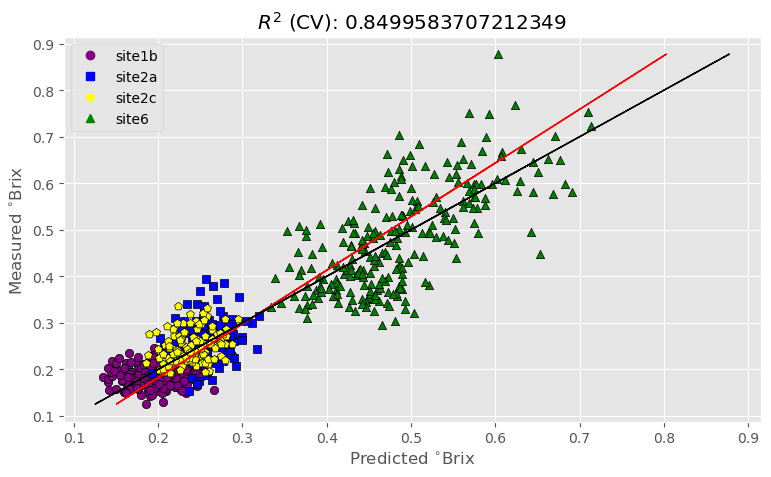

In [22]:
y1_sla_std = y_sla_std[0:250,:]
y2_sla_std = y_sla_std[250:375,:]
y3_sla_std = y_sla_std[375:500,:]
y4_sla_std = y_sla_std[500:800,:]
file_name_sla_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\sla_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
                             y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
                             ncomp_sla_std, labels, file_name_sla_std)

In [71]:
optimal_pls_sla  = PLSRegression(n_components=12)
optimal_pls_sla.fit(opt_Xc_sla_std, y_sla_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_std][wav_sla_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(69,) (69,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.16593618, -0.04996054, -0.23458229,  0.14824784, -0.14897821,
       -0.12267645,  0.13931174,  0.14175744, -0.13356591,  0.22427875,
        0.02171075,  0.08623341, -0.25504233, -0.11725105, -0.094496  ,
       -0.07662024,  0.17520195, -0.13051273,  0.12580275, -0.08097549,
        0.13059055, -0.13279464,  0.15347214,  0.25815726,  0.1146027 ,
       -0.00151052, -0.02572125, -0.16348059, -0.14220778, -0.11875234,
       -0.10373246, -0.20567149, -0.17419663,  0.1309263 ,  0.10788459,
       -0.03294584, -0.19100894, -0.11630441,  0.09974412, -0.2498001 ,
       -0.10836775,  0.17743334,  0.13848104,  0.21893697,  0.2440886 ,
       -0.23596256,  0.19996981, -0.18022217,  0.00506736,  0.13205962,
        0.06855068, -0.13651723, -0.11971752,  0.1362375 , -0.074409  ,
        0.2584478 ,  0.10264529,  0.24818002,  0.17607244,  0.11253954,
       -0.16889887, -0.21365258, -0.11041976,  0.19261383, -0.19423448,
       -0.33113449,  0.25438343,  0.11980089,  0.30264375])

In [72]:
optimal_pls_sla.intercept_

array([0.4568688])

In [73]:
bands_sla

array(['band_368', 'band_156', 'band_387', 'band_260', 'band_32',
       'band_88', 'band_244', 'band_394', 'band_359', 'band_58',
       'band_178', 'band_44', 'band_174', 'band_143', 'band_171',
       'band_345', 'band_381', 'band_342', 'band_91', 'band_106',
       'band_165', 'band_65', 'band_258', 'band_125', 'band_149',
       'band_145', 'band_146', 'band_270', 'band_155', 'band_219',
       'band_40', 'band_355', 'band_97', 'band_26', 'band_397', 'band_89',
       'band_81', 'band_175', 'band_21', 'band_352', 'band_221',
       'band_113', 'band_42', 'band_94', 'band_223', 'band_365',
       'band_235', 'band_364', 'band_116', 'band_226', 'band_180',
       'band_160', 'band_220', 'band_285', 'band_29', 'band_103',
       'band_153', 'band_166', 'band_391', 'band_117', 'band_23',
       'band_185', 'band_114', 'band_398', 'band_93', 'band_176',
       'band_104', 'band_216', 'band_225'], dtype='<U8')

# LDMC

In [23]:
ldmc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\std_ldmc.npy',  allow_pickle=True)

In [24]:

y_ldmc_max = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std = np.array(ldmc_trait_pdf_std)

In [25]:
y_ldmc_max_df = pd.DataFrame(y_ldmc_max, columns=['y_value', 'filename'])
y_ldmc_max_df['filename'] = y_ldmc_max_df['filename'].str.replace('ldmc_', '')

y_ldmc_max_df['y_value'] = pd.to_numeric(y_ldmc_max_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_ldmc_max_df = pd.merge(df_spectral, y_ldmc_max_df, on='filename')
 # Band columns as predictors
    
X_ldmc_ymax = merged_y_ldmc_max_df.filter(regex='^band_').values 
y_ldmc_max = merged_y_ldmc_max_df[['y_value']].values  

In [26]:
y_ldmc_std_df = pd.DataFrame(y_ldmc_std, columns=['y_value', 'filename'])
y_ldmc_std_df['filename'] = y_ldmc_std_df['filename'].str.replace('ldmc_', '')

y_ldmc_std_df['y_value'] = pd.to_numeric(y_ldmc_std_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_ldmc_std_df = pd.merge(df_spectral, y_ldmc_std_df, on='filename')
 # Band columns as predictors
    
X_ldmc_std = merged_y_ldmc_std_df.filter(regex='^band_').values 
y_ldmc_std = merged_y_ldmc_std_df[['y_value']].values  

In [27]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_max = y_ldmc_max[0:250, :]
site2a_y_ldmc_max = y_ldmc_max[250:375, :]
site2c_y_ldmc_max = y_ldmc_max[375:500,:]
site6_y_ldmc_max = y_ldmc_max[500:800,:]


In [28]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_std = y_ldmc_std[0:250, :]
site2a_y_ldmc_std = y_ldmc_std[250:375, :]
site2c_y_ldmc_std = y_ldmc_std[375:500,:]
site6_y_ldmc_std = y_ldmc_std[500:800,:]


50/50 components processed
Optimized number of PLS components: 12
Wavelengths to keep from index: 250
Optimized MSEP: 0.12351417313410328
R2 calib: 0.396
R2 CV: 0.100
MSE calib: 0.011
MSE CV: 0.017
-0.4502697554074304 0.24486548755805626
None
0 site1b -0.7451659774947236 [-0.72115195]
1 site1b -0.757148424436255 [-0.62832355]
2 site1b -0.76919227431664 [-0.67051479]
3 site1b -0.7221791250433017 [-0.66702287]
4 site1b -0.7207047087449254 [-0.74181918]
5 site1b -0.5942832202158721 [-0.6181442]
6 site1b -0.7443035423443911 [-0.63310099]
7 site1b -0.6442619215533752 [-0.73312431]
8 site1b -0.6852437663280484 [-0.69879226]
9 site1b -0.7308161085878218 [-0.68853072]
10 site1b -0.6996219819524898 [-0.64332609]
11 site1b -0.7024474927439551 [-0.6592659]
12 site1b -0.6618406089429405 [-0.6309846]
13 site1b -0.70855281278479 [-0.62291616]
14 site1b -0.6393635348727069 [-0.60426997]
15 site1b -0.6760268136854204 [-0.69667348]
16 site1b -0.6369689521418614 [-0.7111747]
17 site1b -0.599836699572640

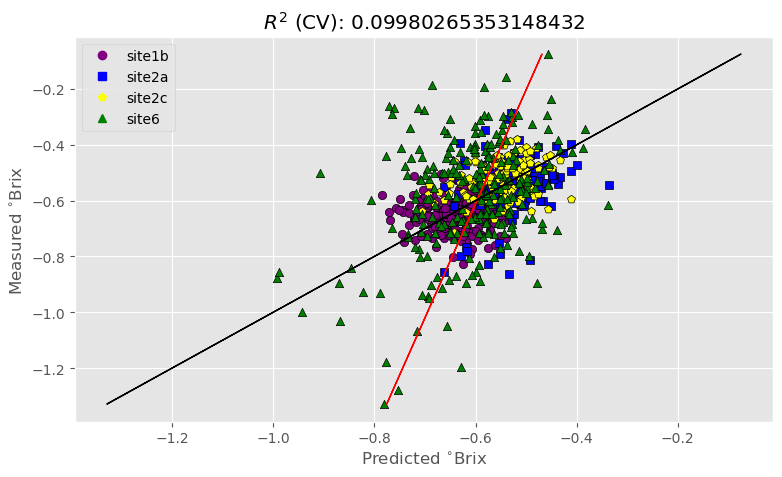

In [29]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 50)
x1_ldmc_max = opt_Xc_ldmc_max[0:250,:]
x2_ldmc_max = opt_Xc_ldmc_max[250:375,:]
x3_ldmc_max = opt_Xc_ldmc_max[375:500,:]
x4_ldmc_max = opt_Xc_ldmc_max[500:800,:]

y1_ldmc_max = y_ldmc_max[0:250,:]
y2_ldmc_max = y_ldmc_max[250:375,:]
y3_ldmc_max = y_ldmc_max[375:500,:]
y4_ldmc_max = y_ldmc_max[500:800,:]
file_name_ldmc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\ldmc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
                             y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

In [74]:
optimal_pls_sla  = PLSRegression(n_components=18)
optimal_pls_sla.fit(opt_Xc_ldmc_max, y_ldmc_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_ldmc_max][wav_ldmc_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(125,) (125,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-1.95041195, -0.87721467,  0.36342698,  0.04939813, -0.90448669,
       -0.38924152, -0.78799056,  1.84143313, -0.02049459, -0.08763566,
        0.55315115, -0.62455729,  0.2039014 ,  0.88466989, -0.58395008,
        0.87498038,  1.30738587, -0.55902392,  0.01433763,  1.08913378,
       -0.3599839 , -0.11823374, -0.96002123, -0.77987509,  0.55639527,
        0.86068062,  1.39577275,  0.61442455, -0.79608007,  0.80140191,
       -0.90894174,  0.55433029, -0.1770847 , -0.6474505 , -0.47602656,
       -0.42796044,  1.03745281,  1.10209081, -1.56022262, -0.24747318,
       -1.16714856, -0.69629045,  1.73338155, -1.63718551, -0.5258245 ,
        0.01661094,  0.98366058, -1.36264915,  0.51500844, -0.86756383,
        1.13717758, -0.01594412,  0.93103011,  1.32768134,  1.58755385,
        1.4421431 , -0.62024885,  0.34644734,  0.88504138,  0.40054461,
       -1.15122588, -1.0475358 ,  1.37544383,  1.44496174,  0.99430448,
       -0.79725065, -0.22048737, -0.52636834,  0.68625265, -0.96

In [75]:
optimal_pls_sla.intercept_

array([-0.47338136])

In [76]:
bands_sla

array(['band_230', 'band_106', 'band_330', 'band_33', 'band_58',
       'band_272', 'band_235', 'band_270', 'band_261', 'band_260',
       'band_90', 'band_282', 'band_244', 'band_391', 'band_403',
       'band_152', 'band_383', 'band_336', 'band_251', 'band_350',
       'band_362', 'band_271', 'band_91', 'band_264', 'band_335',
       'band_129', 'band_368', 'band_283', 'band_285', 'band_398',
       'band_348', 'band_20', 'band_395', 'band_44', 'band_332',
       'band_157', 'band_253', 'band_355', 'band_160', 'band_39',
       'band_95', 'band_75', 'band_281', 'band_247', 'band_353',
       'band_236', 'band_136', 'band_81', 'band_69', 'band_24',
       'band_342', 'band_161', 'band_19', 'band_179', 'band_243',
       'band_228', 'band_86', 'band_176', 'band_62', 'band_180',
       'band_49', 'band_237', 'band_23', 'band_224', 'band_274',
       'band_135', 'band_141', 'band_373', 'band_68', 'band_381',
       'band_177', 'band_65', 'band_134', 'band_394', 'band_174',
       'band_7

50/50 components processed
Optimized number of PLS components: 17
Wavelengths to keep from index: 229
Optimized MSEP: 0.08921032044317727
R2 calib: 0.947
R2 CV: 0.885
MSE calib: 0.002
MSE CV: 0.004
0.050259156971707096 0.8539501676228061
None
0 site1b 0.21648222062495037 [0.19074479]
1 site1b 0.25421751835197387 [0.18918852]
2 site1b 0.26635516011061194 [0.19984455]
3 site1b 0.23925450142840093 [0.22111555]
4 site1b 0.231755028498777 [0.20142005]
5 site1b 0.2043687939271896 [0.21145276]
6 site1b 0.25076690593105794 [0.20739874]
7 site1b 0.2440289319786803 [0.19249731]
8 site1b 0.24996867711180543 [0.17852339]
9 site1b 0.18405297435586937 [0.22048826]
10 site1b 0.24763413164655662 [0.21781871]
11 site1b 0.20444839436595005 [0.20014539]
12 site1b 0.20928264216614817 [0.20254306]
13 site1b 0.20817132467479488 [0.22032969]
14 site1b 0.2734753819408113 [0.23800787]
15 site1b 0.23533452119417392 [0.22010767]
16 site1b 0.29555231203871507 [0.1967136]
17 site1b 0.19732573766621792 [0.19851104]

648 site6 0.5983720557881074 [0.57850854]
649 site6 0.7157482422695217 [0.69154266]
650 site6 0.581815919526065 [0.69683419]
651 site6 0.7270285492958082 [0.82722448]
652 site6 0.5840408659154958 [0.53742843]
653 site6 0.6294353043651784 [0.62319689]
654 site6 0.5363532020717892 [0.65729611]
655 site6 0.5564836673163105 [0.64206028]
656 site6 0.6824877932125141 [0.62728973]
657 site6 0.5735697861254857 [0.59435615]
658 site6 0.591014958340298 [0.58269513]
659 site6 0.5437220007303485 [0.51548505]
660 site6 0.6027368684630021 [0.53801309]
661 site6 0.6357968955640492 [0.61500818]
662 site6 0.5915546785433013 [0.72436199]
663 site6 0.5401166257229932 [0.66880625]
664 site6 0.7192095871025426 [0.60990306]
665 site6 0.6011636589070601 [0.58772046]
666 site6 0.5936474770962875 [0.54750473]
667 site6 0.5936474770962875 [0.64238971]
668 site6 0.6151412854528646 [0.71831902]
669 site6 0.6339428151148406 [0.92384769]
670 site6 0.5874599740361464 [0.68702278]
671 site6 0.5829603852640022 [0.6010

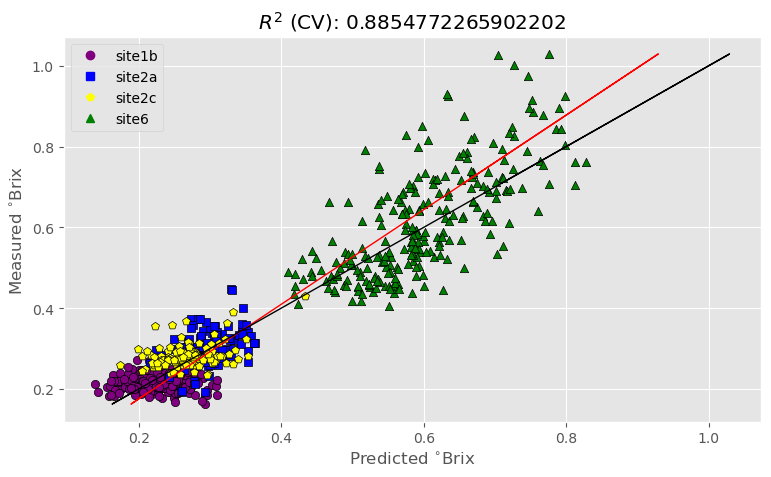

In [30]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 50)

x1_ldmc_std = opt_Xc_ldmc_std[0:250,:]
x2_ldmc_std = opt_Xc_ldmc_std[250:375,:]
x3_ldmc_std = opt_Xc_ldmc_std[375:500,:]
x4_ldmc_std = opt_Xc_ldmc_std[500:800,:]

y1_ldmc_std = y_ldmc_std[0:250,:]
y2_ldmc_std = y_ldmc_std[250:375,:]
y3_ldmc_std = y_ldmc_std[375:500,:]
y4_ldmc_std = y_ldmc_std[500:800,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
                             y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)

In [77]:
optimal_pls_sla  = PLSRegression(n_components=15)
optimal_pls_sla.fit(opt_Xc_ldmc_std, y_ldmc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_ldmc_std][wav_ldmc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(95,) (95,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.44680588,  0.20757121,  0.6233906 ,  0.42111676, -0.43823866,
        0.62910467, -0.30876172, -0.30837644,  0.5804859 , -0.00727591,
       -0.23454074, -0.21336441,  0.31192098, -0.32381274,  0.12313301,
       -0.26174982, -0.36001751,  0.31823403, -0.11748162,  0.27282231,
        0.61892888, -0.28620064, -0.10576694,  0.20795995,  0.03952748,
        0.23722305, -0.33464181,  0.26056934,  0.29196449, -0.19844152,
       -0.30522424, -0.35825787,  0.03749111, -0.41955427, -0.03333479,
       -0.25494257,  0.64593385, -0.26271466, -0.8306877 , -0.29727887,
       -0.30182133,  0.49766567,  0.39550839, -0.29181909, -0.66148179,
       -0.72463703, -0.35850057, -0.53510515, -0.19771543, -0.59027981,
        0.37913068,  0.28550651, -0.46341839, -0.04952382,  0.31092774,
        0.44179043, -0.33615392, -0.60364331, -0.67274413, -0.35679691,
       -0.60493988,  0.22962929,  0.59643759,  0.41204461,  0.58582551,
        0.47899066,  0.44413835, -0.32289853,  0.45610848,  0.46

In [78]:
optimal_pls_sla.intercept_

array([0.9012134])

In [79]:
bands_sla

array(['band_224', 'band_254', 'band_360', 'band_102', 'band_280',
       'band_53', 'band_173', 'band_365', 'band_137', 'band_367',
       'band_279', 'band_23', 'band_71', 'band_184', 'band_397',
       'band_70', 'band_88', 'band_285', 'band_81', 'band_180',
       'band_166', 'band_392', 'band_127', 'band_120', 'band_90',
       'band_114', 'band_220', 'band_266', 'band_161', 'band_146',
       'band_101', 'band_131', 'band_233', 'band_378', 'band_21',
       'band_177', 'band_383', 'band_89', 'band_350', 'band_34',
       'band_334', 'band_234', 'band_244', 'band_83', 'band_265',
       'band_278', 'band_387', 'band_178', 'band_25', 'band_78',
       'band_94', 'band_329', 'band_51', 'band_136', 'band_44',
       'band_236', 'band_252', 'band_176', 'band_145', 'band_156',
       'band_160', 'band_18', 'band_58', 'band_256', 'band_85',
       'band_125', 'band_153', 'band_357', 'band_359', 'band_158',
       'band_349', 'band_63', 'band_26', 'band_381', 'band_55', 'band_47',
      

# PN

In [31]:
pn_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\trait_numpy\ymax_pn.npy',  allow_pickle=True)
pn_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\trait_numpy\std_pn.npy',  allow_pickle=True)

In [32]:
y_pn_max = np.array(pn_trait_pdf_ymax)

y_pn_std = np.array(pn_trait_pdf_std)

In [33]:
y_pn_max_df = pd.DataFrame(y_pn_max, columns=['y_value', 'filename'])
y_pn_max_df['filename'] = y_pn_max_df['filename'].str.replace('pn_', '')

y_pn_max_df['y_value'] = pd.to_numeric(y_pn_max_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_pn_max_df = pd.merge(df_spectral, y_pn_max_df, on='filename')
 # Band columns as predictors
    
X_pn_ymax = merged_y_pn_max_df.filter(regex='^band_').values 
y_pn_max = merged_y_pn_max_df[['y_value']].values  

In [34]:
y_pn_std_df = pd.DataFrame(y_pn_std, columns=['y_value', 'filename'])
y_pn_std_df['filename'] = y_pn_std_df['filename'].str.replace('pn_', '')

y_pn_std_df['y_value'] = pd.to_numeric(y_pn_std_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_pn_std_df = pd.merge(df_spectral, y_pn_std_df, on='filename')
 # Band columns as predictors
    
X_pn_std = merged_y_pn_std_df.filter(regex='^band_').values 
y_pn_std = merged_y_pn_std_df[['y_value']].values  

In [35]:
site1b_y_pn_max = y_pn_max[0:250, :]
site2a_y_pn_max = y_pn_max[250:375, :]
site2c_y_pn_max = y_pn_max[375:500,:]
site6_y_pn_max = y_pn_max[500:800,:]


In [36]:
site1b_y_pn_std = y_pn_std[0:250, :]
site2a_y_pn_std = y_pn_std[250:375, :]
site2c_y_pn_std = y_pn_std[375:500,:]
site6_y_pn_std = y_pn_std[500:800,:]


50/50 components processed
Optimized number of PLS components: 14
Wavelengths to keep from index: 239
Optimized MSEP: 0.23891310827604934
R2 calib: 0.658
R2 CV: 0.514
MSE calib: 0.037
MSE CV: 0.052
0.19415085095053558 0.5586216387890494
None
0 site1b 0.3629537449905989 [0.24561063]
1 site1b 0.4720576967490387 [0.57010485]
2 site1b 0.1887906283473571 [0.21997311]
3 site1b 0.3566279605066692 [0.10182839]
4 site1b 0.2156770201536789 [0.40738836]
5 site1b 0.32834857947120605 [0.27418289]
6 site1b 0.3903791900195415 [0.21791173]
7 site1b 0.2350914852120159 [0.38504459]
8 site1b 0.31846888060594997 [0.24829175]
9 site1b 0.35993710176137644 [0.29783653]
10 site1b 0.5051767515317154 [0.28216079]
11 site1b 0.3492046119407946 [0.21103555]
12 site1b 0.34601263179957026 [0.508051]
13 site1b 0.23951248030515943 [0.49888839]
14 site1b 0.3579367697929093 [0.39926382]
15 site1b 0.4024127149170161 [0.49867339]
16 site1b 0.48153266686609114 [0.40063976]
17 site1b 0.31640992313172833 [0.318802]
18 site1b

620 site6 0.18300680927870766 [0.87514395]
621 site6 0.05161502494411235 [0.60530034]
622 site6 0.27914216990025637 [0.30705603]
623 site6 0.5714796418265033 [0.5121451]
624 site6 0.6694575948535662 [0.63253048]
625 site6 0.3467889525135684 [0.59118393]
626 site6 0.8580306314292423 [0.66062405]
627 site6 0.2212812938414231 [-0.13736664]
628 site6 0.2212812938414231 [-0.48928313]
629 site6 0.06566198665370654 [0.52684236]
630 site6 0.5718953551532091 [0.60428351]
631 site6 0.7413882737001538 [0.57096012]
632 site6 0.4865916033241134 [0.41770162]
633 site6 0.6706448978915862 [0.60032871]
634 site6 0.5843214675760071 [0.70885774]
635 site6 0.5029202781376947 [-0.65710531]
636 site6 0.29960274869709497 [0.39758259]
637 site6 0.42213024118794945 [0.33310563]
638 site6 0.7221709974826993 [0.45340203]
639 site6 0.537007297447814 [0.5619386]
640 site6 0.5642285240600537 [0.53959779]
641 site6 0.344318915828789 [0.40851992]
642 site6 0.5442426663895077 [0.39159269]
643 site6 0.7224369899408349 

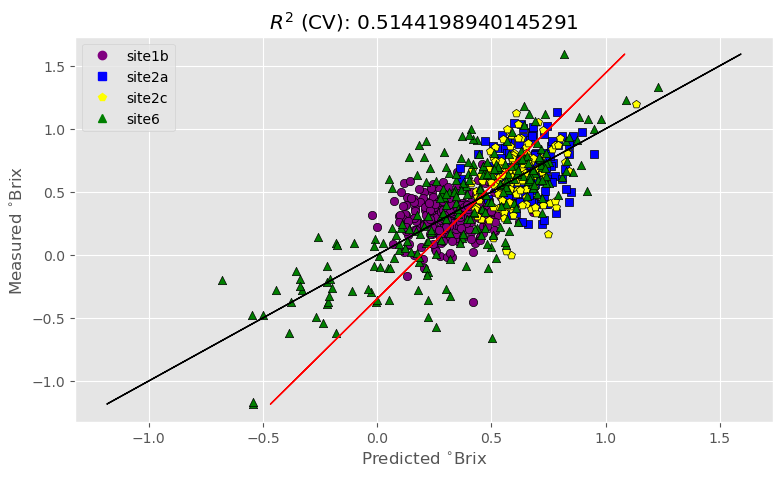

In [37]:
opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(x, y_pn_max, 50)
x1_pn_max = opt_Xc_pn_max[0:250,:]
x2_pn_max = opt_Xc_pn_max[250:375,:]
x3_pn_max = opt_Xc_pn_max[375:500,:]
x4_pn_max = opt_Xc_pn_max[500:800,:]

y1_pn_max = y_pn_max[0:250,:]
y2_pn_max = y_pn_max[250:375,:]
y3_pn_max = y_pn_max[375:500,:]
y4_pn_max = y_pn_max[500:800,:]
file_name_pn_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\pn_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pn_max,x1_pn_max,x2_pn_max,x3_pn_max,x4_pn_max,
                             y_pn_max,y1_pn_max,y2_pn_max,y3_pn_max,y4_pn_max,
                             ncomp_pn_max, labels, file_name_pn_max)

50/50 components processed
Optimized number of PLS components: 12
Wavelengths to keep from index: 235
Optimized MSEP: 0.13959510101351497
R2 calib: 0.741
R2 CV: 0.573
MSE calib: 0.011
MSE CV: 0.019
0.21831694673300595 0.5944961590974795
None
0 site1b 0.4053846338869782 [0.22779361]
1 site1b 0.3981696523246828 [0.26652189]
2 site1b 0.4235705938915214 [0.21750287]
3 site1b 0.47496072392697314 [0.30283171]
4 site1b 0.3459965845698021 [0.29061193]
5 site1b 0.4217635132213634 [0.24377647]
6 site1b 0.46221960183736255 [0.24610716]
7 site1b 0.4387135318142594 [0.20222772]
8 site1b 0.5125394807909682 [0.21251855]
9 site1b 0.36854278597426526 [0.26777919]
10 site1b 0.49030204842151326 [0.27015958]
11 site1b 0.43015713750576023 [0.32847803]
12 site1b 0.43656401194792616 [0.25983335]
13 site1b 0.3394966937634639 [0.19652994]
14 site1b 0.37848658907739263 [0.26042273]
15 site1b 0.5623833352762546 [0.25489596]
16 site1b 0.42824488177267217 [0.20563027]
17 site1b 0.37912906588492035 [0.28197515]
18 

218 site1b 0.2994652333149681 [0.44771891]
219 site1b 0.3035828861011457 [0.48692767]
220 site1b 0.30530922462920596 [0.26174635]
221 site1b 0.25963486369967415 [0.29296488]
222 site1b 0.1564789232712177 [0.2914484]
223 site1b 0.27719924934979784 [0.33495553]
224 site1b 0.35752980586236005 [0.51273953]
225 site1b 0.30090549380447695 [0.35638918]
226 site1b 0.2701259187410783 [0.32304596]
227 site1b 0.337417391478085 [0.29257453]
228 site1b 0.30371390468756176 [0.52797323]
229 site1b 0.3562388714072312 [0.22212996]
230 site1b 0.2551971574669736 [0.35387315]
231 site1b 0.3072321320731355 [0.32055001]
232 site1b 0.2866667104185323 [0.27933257]
233 site1b 0.22715103046260776 [0.25849373]
234 site1b 0.3178351429182774 [0.25808076]
235 site1b 0.2976734872252439 [0.26908439]
236 site1b 0.3325038504228338 [0.21710149]
237 site1b 0.19042779302505497 [0.22027533]
238 site1b 0.4431508759939381 [0.35203071]
239 site1b 0.22065373229514207 [0.28172632]
240 site1b 0.37469874216381016 [0.21063273]
241

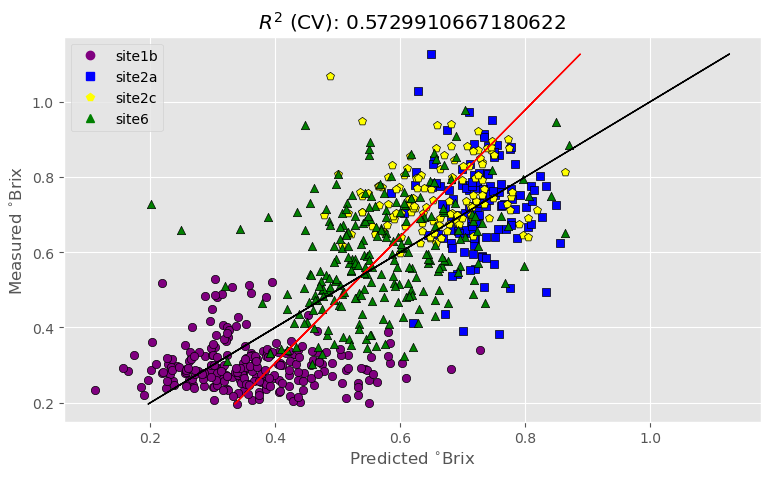

In [38]:
opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(x, y_pn_std, 50)

x1_pn_std = opt_Xc_pn_std[0:250,:]
x2_pn_std = opt_Xc_pn_std[250:375,:]
x3_pn_std = opt_Xc_pn_std[375:500,:]
x4_pn_std = opt_Xc_pn_std[500:800,:]

y1_pn_std = y_pn_std[0:250,:]
y2_pn_std = y_pn_std[250:375,:]
y3_pn_std = y_pn_std[375:500,:]
y4_pn_std = y_pn_std[500:800,:]
file_name_pn_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\pn_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pn_std,x1_pn_std,x2_pn_std,x3_pn_std,x4_pn_std,
                             y_pn_std,y1_pn_std,y2_pn_std,y3_pn_std,y4_pn_std,
                             ncomp_pn_std, labels, file_name_pn_std)

# PC

In [44]:
pc_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\trait_numpy\ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\trait_numpy\std_pc.npy',  allow_pickle=True)

In [45]:
y_pc_max = np.array(pc_trait_pdf_ymax)

y_pc_std = np.array(pc_trait_pdf_std)

In [46]:
y_pc_max_df = pd.DataFrame(y_pc_max, columns=['y_value', 'filename'])
y_pc_max_df['filename'] = y_pc_max_df['filename'].str.replace('pc_', '')

y_pc_max_df['y_value'] = pd.to_numeric(y_pc_max_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_pc_max_df = pd.merge(df_spectral, y_pc_max_df, on='filename')
 # Band columns as predictors
    
X_pc_ymax = merged_y_pc_max_df.filter(regex='^band_').values 
y_pc_max = merged_y_pc_max_df[['y_value']].values  

In [47]:
y_pc_std_df = pd.DataFrame(y_pc_std, columns=['y_value', 'filename'])
y_pc_std_df['filename'] = y_pc_std_df['filename'].str.replace('pn_', '')

y_pc_std_df['y_value'] = pd.to_numeric(y_pc_std_df['y_value'])

# Merge y1_cleaned with df_spectral
merged_y_pc_std_df = pd.merge(df_spectral, y_pc_std_df, on='filename')
 # Band columns as predictors
    
X_pc_std = merged_y_pc_std_df.filter(regex='^band_').values 
y_pc_std = merged_y_pc_std_df[['y_value']].values  

In [48]:
site1b_y_pc_max = y_pc_max[0:250, :]
site2a_y_pc_max = y_pc_max[250:375, :]
site2c_y_pc_max = y_pc_max[375:500,:]
site6_y_pc_max = y_pc_max[500:800,:]


In [49]:
site1b_y_pc_std = y_pc_std[0:250, :]
site2a_y_pc_std = y_pc_std[250:375, :]
site2c_y_pc_std = y_pc_std[375:500,:]
site6_y_pc_std = y_pc_std[500:800,:]



50/50 components processed
Optimized number of PLS components: 11
Wavelengths to keep from index: 269
Optimized MSEP: 0.041266409785017895
R2 calib: 0.561
R2 CV: 0.388
MSE calib: 0.001
MSE CV: 0.002
2.172475594354741 0.4351599879123497
None
0 site1b 3.7955887869914515 [3.7995022]
1 site1b 3.799012259090465 [3.76316424]
2 site1b 3.804326508435004 [3.80000734]
3 site1b 3.792545856224586 [3.82037726]
4 site1b 3.8042525289135147 [3.7915703]
5 site1b 3.798231312059376 [3.80082831]
6 site1b 3.7990099644423054 [3.81882779]
7 site1b 3.782348156889289 [3.79529688]
8 site1b 3.832487904168295 [3.83006526]
9 site1b 3.795705962632208 [3.8042154]
10 site1b 3.788108960460998 [3.80303309]
11 site1b 3.794597806522293 [3.8533218]
12 site1b 3.791944543414187 [3.80528065]
13 site1b 3.7790408324414564 [3.7763168]
14 site1b 3.8027879841643175 [3.79338853]
15 site1b 3.826214971703187 [3.81834316]
16 site1b 3.7872949147831805 [3.77762564]
17 site1b 3.8094990190702056 [3.80807168]
18 site1b 3.8015126345396064 

264 site2a 3.809038702870847 [3.89442947]
265 site2a 3.8419554836842966 [3.91547138]
266 site2a 3.846063852879986 [3.79963843]
267 site2a 3.854476552536084 [3.83877689]
268 site2a 3.8493021584980327 [3.84795379]
269 site2a 3.8662947509656136 [3.88348499]
270 site2a 3.8588993590535905 [3.8748639]
271 site2a 3.847056548320355 [3.86642682]
272 site2a 3.850748296057269 [3.87320449]
273 site2a 3.8316842508390816 [3.88204736]
274 site2a 3.8738098936422585 [3.82170163]
275 site2a 3.8610421562788066 [3.81426749]
276 site2a 3.8531100553644078 [3.81712291]
277 site2a 3.864023468407444 [3.85629163]
278 site2a 3.839307013253167 [3.86001994]
279 site2a 3.844362308689395 [3.86499349]
280 site2a 3.8642566461697427 [3.8291455]
281 site2a 3.8442887670513795 [3.81059689]
282 site2a 3.8657224128515684 [3.79638959]
283 site2a 3.829348699121898 [3.8212115]
284 site2a 3.856011366228022 [3.82332335]
285 site2a 3.8721640753912236 [3.84446746]
286 site2a 3.846930168728227 [3.85491642]
287 site2a 3.855820857459

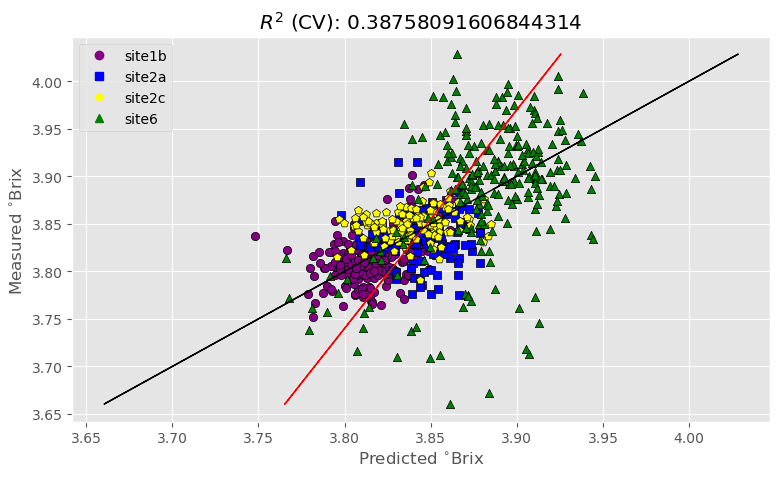

In [50]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(x, y_pc_max, 50)
x1_pc_max = opt_Xc_pc_max[0:250,:]
x2_pc_max = opt_Xc_pc_max[250:375,:]
x3_pc_max = opt_Xc_pc_max[375:500,:]
x4_pc_max = opt_Xc_pc_max[500:800,:]

y1_pc_max = y_pc_max[0:250,:]
y2_pc_max = y_pc_max[250:375,:]
y3_pc_max = y_pc_max[375:500,:]
y4_pc_max = y_pc_max[500:800,:]
file_name_pc_max = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\pc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_max,x1_pc_max, x2_pc_max,x3_pc_max,x4_pc_max,
                             y_pc_max,y1_pc_max,y2_pc_max,y3_pc_max,y4_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

In [80]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_pc_max, y_pc_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_max][wav_pc_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(64,) (64,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.14460656,  0.04726527,  0.21212775, -0.19952907,  0.21080505,
        0.07859413,  0.15911853,  0.02146485, -0.13996731, -0.12197604,
       -0.21714375, -0.06423986, -0.06581278,  0.2921685 ,  0.11966465,
        0.12325484, -0.01230507, -0.26183336, -0.17023688, -0.14050069,
        0.154399  , -0.23788195,  0.16079482,  0.13256118,  0.12110931,
        0.05410322, -0.03859663, -0.18811289,  0.27464986, -0.16574682,
       -0.10297506,  0.10601329, -0.04808029, -0.17385222, -0.19052762,
       -0.08610729, -0.12072724,  0.04816717, -0.07929021, -0.16187802,
        0.09420619,  0.00366308, -0.01232536,  0.1223435 , -0.0634716 ,
        0.14985525,  0.06949759,  0.10795856, -0.18073604, -0.26783638,
        0.30004511,  0.32450664,  0.16359751, -0.21547435,  0.19079199,
        0.03899229, -0.2278866 , -0.22835326, -0.16181782,  0.09576389,
        0.20465384,  0.14216589, -0.12364692,  0.26647171])

In [81]:
optimal_pls_sla.intercept_

array([3.82818601])

In [82]:
bands_sla

array(['band_167', 'band_100', 'band_262', 'band_225', 'band_254',
       'band_179', 'band_393', 'band_85', 'band_230', 'band_372',
       'band_360', 'band_160', 'band_339', 'band_258', 'band_336',
       'band_107', 'band_396', 'band_232', 'band_170', 'band_166',
       'band_117', 'band_87', 'band_184', 'band_86', 'band_181',
       'band_69', 'band_102', 'band_130', 'band_98', 'band_354',
       'band_112', 'band_261', 'band_40', 'band_376', 'band_119',
       'band_62', 'band_120', 'band_37', 'band_220', 'band_342',
       'band_154', 'band_109', 'band_398', 'band_374', 'band_172',
       'band_114', 'band_399', 'band_217', 'band_30', 'band_84',
       'band_386', 'band_331', 'band_43', 'band_397', 'band_401',
       'band_271', 'band_373', 'band_22', 'band_284', 'band_19',
       'band_223', 'band_136', 'band_338', 'band_27'], dtype='<U8')

In [51]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(x, y_pc_std, 50)

x1_pc_std = opt_Xc_pc_std[0:250,:]
x2_pc_std = opt_Xc_pc_std[250:375,:]
x3_pc_std = opt_Xc_pc_std[375:500,:]
x4_pc_std = opt_Xc_pc_std[500:800,:]

y1_pc_std = y_pc_std[0:250,:]
y2_pc_std = y_pc_std[250:375,:]
y3_pc_std = y_pc_std[375:500,:]
y4_pc_std = y_pc_std[500:800,:]
file_name_pc_std = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\csv\pc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_std,x1_pc_std,x2_pc_std,x3_pc_std,x4_pc_std,
                             y_pc_std,y1_pc_std,y2_pc_std,y3_pc_std,y4_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)

ValueError: Found input variables with inconsistent numbers of samples: [748, 0]

In [83]:
optimal_pls_sla  = PLSRegression(n_components=13)
optimal_pls_sla.fit(opt_Xc_pc_std, y_pc_std[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_pc_std][wav_pc_std:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(101,) (101,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([ 0.08305604,  0.02563276,  0.07001932, -0.07330928, -0.02959904,
       -0.06181238,  0.05166224,  0.0423939 ,  0.08608444,  0.03241446,
        0.00589102,  0.03105683,  0.03610003, -0.07109218, -0.01392581,
       -0.08098043,  0.05535809,  0.0436423 ,  0.06043147, -0.09003709,
       -0.03564026, -0.06876465, -0.02642302,  0.01485242,  0.07402576,
        0.03041181,  0.06124964, -0.04902139,  0.04406641,  0.01223253,
       -0.04552591, -0.02248769, -0.06851422,  0.06682079, -0.01776066,
        0.01342628, -0.06237076,  0.0108453 , -0.02556704, -0.04705706,
       -0.04222951,  0.0637625 , -0.06987194,  0.08712824, -0.06206856,
        0.06909553, -0.06813872,  0.01971074,  0.04089133,  0.03832639,
        0.035126  , -0.06999792,  0.06964782,  0.00515899, -0.0722595 ,
        0.00646491, -0.0654743 , -0.07860738,  0.08014102,  0.07077531,
        0.08535242,  0.03833126, -0.07515243, -0.08364529,  0.06712663,
       -0.09733121,  0.07829827, -0.08182713,  0.06428929,  0.06

In [84]:
optimal_pls_sla.intercept_

array([0.15281088])

In [85]:
bands_sla

array(['band_331', 'band_133', 'band_332', 'band_349', 'band_156',
       'band_270', 'band_125', 'band_379', 'band_262', 'band_235',
       'band_52', 'band_236', 'band_404', 'band_96', 'band_268',
       'band_48', 'band_147', 'band_113', 'band_144', 'band_252',
       'band_217', 'band_352', 'band_162', 'band_58', 'band_170',
       'band_118', 'band_149', 'band_364', 'band_92', 'band_69',
       'band_81', 'band_34', 'band_396', 'band_373', 'band_185',
       'band_21', 'band_177', 'band_72', 'band_221', 'band_88',
       'band_393', 'band_148', 'band_61', 'band_137', 'band_40',
       'band_54', 'band_145', 'band_226', 'band_153', 'band_371',
       'band_389', 'band_178', 'band_94', 'band_233', 'band_65',
       'band_26', 'band_357', 'band_164', 'band_381', 'band_103',
       'band_85', 'band_44', 'band_143', 'band_355', 'band_258',
       'band_224', 'band_165', 'band_342', 'band_380', 'band_59',
       'band_220', 'band_24', 'band_176', 'band_337', 'band_42',
       'band_216'